In [564]:
import pandas as pd

# cm_features = pd.read_csv('data/cm_features_with_name.csv')
cm_features = pd.read_csv('data/cm_features_v0.4.csv')
cm_features

,month_id,country_id,gleditsch_ward,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,...,renewable_internal_pcap_t48,renewable_pcap_t48,splag_1_decay_ged_sb_5,splag_1_decay_ged_os_5,splag_1_decay_ged_ns_5,country,date,year,ccode,gw_statename
0,121,1,110,0,0,0,0,0,0,0,...,315260.986388,354505.092577,0.093750,1.034032,0.093750,Guyana,1990-01-01,1990,110,Guyana
1,121,2,115,0,0,0,0,0,0,0,...,264606.831667,264606.831667,0.062500,0.062500,0.062500,Suriname,1990-01-01,1990,115,Surinam
2,121,3,52,0,0,0,0,0,0,0,...,3244.939711,3244.939711,0.000000,0.000000,0.000000,Trinidad and Tobago,1990-01-01,1990,52,Trinidad and Tobago
3,121,4,101,0,0,12,0,0,0,0,...,45295.968642,74555.476336,1.062500,1.062500,0.093750,Venezuela,1990-01-01,1990,101,Venezuela
4,121,7,160,0,0,0,0,0,0,0,...,9511.721633,28542.982753,0.874154,0.156250,0.156250,Argentina,1990-01-01,1990,160,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63203,502,242,510,0,0,1,0,0,2,30,...,1536.763246,1761.240449,4.412313,3.889290,2.105145,Tanzania,2021-10-01,2021,510,Tanzania/Tanganyika
63204,502,243,600,0,0,0,2,2,0,5,...,815.035895,815.035895,0.823197,0.049630,0.060734,Morocco,2021-10-01,2021,600,Morocco
63205,502,244,435,0,0,0,0,0,0,0,...,93.401859,2661.952986,1.844790,1.055986,1.065787,Mauritania,2021-10-01,2021,435,Mauritania
63206,502,245,625,3,3,9,2,1,42,82,...,98.007034,926.166474,5.816131,4.897757,4.263890,Sudan,2021-10-01,2021,625,Sudan


In [565]:
from utilities import views_month_id_to_date

# load benchmark model
prediction_year = 2020
model_names = {
    "bootstrap": "bm_cm_bootstrap_expanded_",
    "poisson": "bm_cm_last_historical_poisson_expanded_",
}
benchmark_model = pd.read_parquet(f'Benchmarks/{model_names["poisson"]}{prediction_year}.parquet')
# Group by 'month_id' and 'country_id' and calculate mean and std for each group
agg_funcs = {
    'outcome': ['mean', 'std']  # Assuming 'prediction' is the column to aggregate; adjust if necessary
}
# there is 20 draws per each country per each month. Get the mean of the draws and std for each month
benchmark_model = benchmark_model.groupby(['month_id', 'country_id']).agg(agg_funcs).reset_index()
# Flatten the multi-level columns resulting from aggregation
benchmark_model.columns = ['_'.join(col).strip() if col[1] else col[0] for col in benchmark_model.columns.values]
# Rename columns
benchmark_model.rename(columns={'outcome_mean': 'outcome', 'outcome_std': 'outcome_std'}, inplace=True)

# add date column
benchmark_model['date'] = views_month_id_to_date(benchmark_model['month_id'])
print(benchmark_model['month_id'].unique())
benchmark_model

[481 482 483 484 485 486 487 488 489 490 491 492]


,month_id,country_id,outcome,outcome_std,date
0,481,1,0.000,0.000000,2020-01-01
1,481,2,0.000,0.000000,2020-01-01
2,481,3,0.000,0.000000,2020-01-01
3,481,4,0.000,0.000000,2020-01-01
4,481,5,0.000,0.000000,2020-01-01
...,...,...,...,...,...
2287,492,242,0.000,0.000000,2020-12-01
2288,492,243,0.000,0.000000,2020-12-01
2289,492,244,0.000,0.000000,2020-12-01
2290,492,245,0.000,0.000000,2020-12-01


In [566]:
# load actuals
actuals_model = pd.read_parquet(f'actuals/cm/window=Y{prediction_year}/cm_actuals_{prediction_year}.parquet')
# actuals_model = actuals_model.groupby(['month_id', 'country_id']).mean().reset_index()
actuals_model['date'] = views_month_id_to_date(actuals_model['month_id'])
print(actuals_model['month_id'].unique())
actuals_model

[481 482 483 484 485 486 487 488 489 490 491 492]


,month_id,country_id,ged_sb,date
0,481,1,0.0,2020-01-01
1,481,2,0.0,2020-01-01
2,481,3,0.0,2020-01-01
3,481,4,0.0,2020-01-01
4,481,5,0.0,2020-01-01
...,...,...,...,...
2287,492,242,0.0,2020-12-01
2288,492,243,0.0,2020-12-01
2289,492,244,0.0,2020-12-01
2290,492,245,0.0,2020-12-01


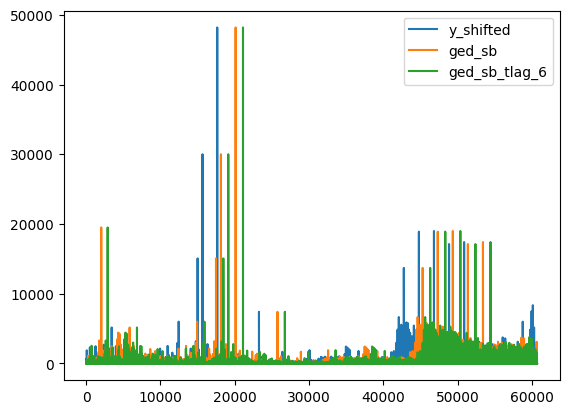

In [567]:
cm_features['y_shifted'] = cm_features.groupby('country_id')['ged_sb'].shift(-15)  # 3 months gap + 12 months prediction
# show na for y_shifted
cm_features[cm_features['y_shifted'].isna()]
# drop na
cm_features = cm_features.dropna()
# plot y_shifted per month
from matplotlib import pyplot as plt

cm_features['y_shifted'].plot()
cm_features['ged_sb'].plot()
cm_features['ged_sb_tlag_6'].plot()
plt.legend()
plt.show()

In [568]:
# drop all ged_sb_tlag_x except for the ged_sb_tlag_6
cm_features = cm_features.drop(columns=['country', 'gleditsch_ward'])
# drop if exists 'year', 'ccode'
cm_features = cm_features.drop(columns=['year', 'ccode'], errors='ignore')

# cm_features = cm_features.drop(
#     columns=['ged_sb_tlag_2', 'ged_sb_tlag_3', 'ged_sb_tlag_4', 'ged_sb_tlag_5', 'ged_sb_tlag_1', 'ged_sb_tlag_6', ])
# # drop ged_sb, ged_ns, ged_os, acled_sb, acled_sb_ count, acled_os, ged_sb_tsum_24
# cm_features = cm_features.drop(
#     columns=['ged_sb', 'ged_ns', 'ged_os', 'acled_sb', 'acled_sb_count', 'acled_os', 'ged_sb_tsum_24', 'ged_os_tlag_1'])
# # drop splag_1_decay_ged_sb_5, splag_1_decay_ged_os_5, splag_1_decay_ged_ns_5, decay_ged_sb_5, decay_ged_os_5, decay_ged_sb_500, decay_ged_os_100, decay_ged_ns_5, decay_ged_ns_100, decay_acled_sb_5, decay_acled_os_5, decay_acled_ns_5
# cm_features = cm_features.drop(
#     columns=['splag_1_decay_ged_sb_5', 'splag_1_decay_ged_os_5', 'splag_1_decay_ged_ns_5', 'decay_ged_sb_5',
#              'decay_ged_os_5', 'decay_ged_sb_500', 'decay_ged_os_100', 'decay_ged_ns_5', 'decay_ged_ns_100',
#              'decay_acled_sb_5', 'decay_acled_os_5', 'decay_acled_ns_5', 'decay_ged_sb_100'])



In [569]:
# save first 50 rows of the dataset to a new csv file with column names
# cm_features.head(50).to_csv('data/cm_features_first_50.csv', index=True)
# cm_features.head(10)
# prepare dataset for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cm_features['date'] = pd.to_datetime(cm_features['date'])
cm_features['country_id'] = cm_features['country_id'].astype('category')
cm_features

,month_id,country_id,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,...,general_efficiency_t48,water_stress_t48,renewable_internal_pcap_t48,renewable_pcap_t48,splag_1_decay_ged_sb_5,splag_1_decay_ged_os_5,splag_1_decay_ged_ns_5,date,gw_statename,y_shifted
0,121,1,0,0,0,0,0,0,0,752897,...,1.380676,3.333333,315260.986388,354505.092577,0.093750,1.034032,0.093750,1990-01-01,Guyana,0.0
1,121,2,0,0,0,0,0,0,0,408360,...,3.922495,2.950609,264606.831667,264606.831667,0.062500,0.062500,0.062500,1990-01-01,Surinam,0.0
2,121,3,0,0,0,0,0,0,0,1256210,...,36.015231,17.956469,3244.939711,3244.939711,0.000000,0.000000,0.000000,1990-01-01,Trinidad and Tobago,0.0
3,121,4,0,0,12,0,0,0,0,19275292,...,26.864392,2.249173,45295.968642,74555.476336,1.062500,1.062500,0.093750,1990-01-01,Venezuela,0.0
4,121,7,0,0,0,0,0,0,0,32165766,...,11.043387,7.800305,9511.721633,28542.982753,0.874154,0.156250,0.156250,1990-01-01,Argentina,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60668,487,242,0,0,0,0,0,0,0,59872579,...,6.594440,12.963241,1583.434859,1814.729450,4.569363,4.371473,2.248713,2020-07-01,Tanzania/Tanganyika,0.0
60669,487,243,0,0,0,0,0,0,0,36304408,...,7.966655,50.751212,825.592620,825.592620,0.911026,0.076540,0.093665,2020-07-01,Morocco,0.0
60670,487,244,0,0,0,0,0,0,0,4383849,...,3.627975,13.246217,96.072254,2738.059240,1.944327,1.130247,1.072989,2020-07-01,Mauritania,0.0
60671,487,245,3,107,12,10,1,50,176,43232093,...,2.478948,118.656388,100.382863,948.618053,6.108470,4.948411,4.582199,2020-07-01,Sudan,3.0


In [570]:
SAVE_PREDICTIONS = True
INCLUDE_COUNTRY_ID = True
INCLUDE_MONTH_ID = True

In [571]:
from sklearn.preprocessing import OneHotEncoder

# Define the split date


# features_to_exclude = ['id', 'country', 'ged_sb_tlag_6']
# features = [col for col in cm_features.columns if col not in features_to_exclude]

# X_train = train_df[features]
# y_train = train_df['ged_sb_tlag_6']
# X_test = test_df[features]
# y_test = test_df['ged_sb_tlag_6']
# 
# X_train[features]

In [572]:
# One-hot encode 'country_id'
if INCLUDE_COUNTRY_ID:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoder.fit_transform(cm_features[['country_id']])
    countries_encoded = encoder.transform(cm_features[['country_id']])
    # rename the columns
    countries_encoded = pd.DataFrame(countries_encoded, columns=encoder.get_feature_names_out(['country_id']))
    countries_encoded = countries_encoded.drop(columns='country_id_1')  # drop country_id_1
    # drop na 

    # countries_encoded
    # merge the encoded features with the original dataset
    cm_features = pd.concat([cm_features, countries_encoded], axis=1)
    cm_features = cm_features.dropna()
cm_features

,month_id,country_id,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,...,country_id_231,country_id_233,country_id_234,country_id_235,country_id_237,country_id_242,country_id_243,country_id_244,country_id_245,country_id_246
0,121.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,752897.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,121.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408360.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,121.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1256210.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,121.0,4,0.0,0.0,12.0,0.0,0.0,0.0,0.0,19275292.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,121.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32165766.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59874,483.0,62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10698683.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59875,483.0,63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18513673.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59876,483.0,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5347896.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59877,483.0,65,2.0,0.0,0.0,0.0,0.0,0.0,50.0,144406261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [573]:
# Split the dataset into training and test sets
# prediction_year = 2018
# test(final model evaluation): Jan 2018 - Jan 2019
# oct 2016 predicts Jan 2018
# oct 2017 predicts Jan 2019
# thus train set is up until Oct 2016
cut_year = prediction_year - 2  # 2016

features_to_val_oct = pd.Timestamp(year=cut_year - 1, month=10, day=1)  # 2016-Oct-01
features_to_oct = pd.Timestamp(year=cut_year, month=10, day=1)  # 2016-Oct-01

# Splitting the dataset
CREATE_VAL_DS = False
if CREATE_VAL_DS:
    train_df = cm_features[cm_features['date'] < features_to_val_oct]  # train is till Sep 2015
    validation_df = cm_features[
        (cm_features['date'] >= features_to_val_oct) &  # oct 2015 predicts Jan 2017
        (cm_features['date'] < features_to_oct)]
else:
    train_df = cm_features[cm_features['date'] < features_to_oct]  # train is till Sep 2016
# test_df is one year from Oct 2016 to Oct 2017
test_df = cm_features[
    (cm_features['date'] >= features_to_oct) &  # oct 2016 predicts Jan 2018
    (cm_features['date'] < pd.Timestamp(year=prediction_year - 1, month=10, day=1))]  # oct 2017 predicts Jan 2019

In [574]:
# count number of rows where y_shifted is 0
# drop 0 rows from train df 
DROP_0_ROWS_PERCENT = 80
print(f"Initial count: {train_df[train_df['y_shifted'] == 0].shape[0]}")
indices = train_df[train_df['y_shifted'] == 0].index.to_series()
num_to_drop = int(len(indices) * DROP_0_ROWS_PERCENT / 100)
indices_to_drop = indices.sample(n=num_to_drop, random_state=42)
train_df = train_df.drop(indices_to_drop)
print(f"Count after removal: {train_df[train_df['y_shifted'] == 0].shape[0]}")
test_df.reset_index(drop=True, inplace=True)

Initial count: 48510
Count after removal: 9702


In [575]:
# shuffle the training set
# train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [576]:
# save date column for test_df
test_df_date = test_df['date']
train_df_date = train_df['date']
test_df_country_name = test_df['gw_statename']
train_df_country_name = train_df['gw_statename']
train_df_country_id = train_df['country_id']
test_df_country_id = test_df['country_id']
train_df_month_id = train_df['month_id']
test_df_month_id = test_df['month_id']

test_df = test_df.drop('date', axis=1)
test_df = test_df.drop("country_id", axis=1)
test_df = test_df.drop("gw_statename", axis=1)

if CREATE_VAL_DS:
    val_df_date = validation_df['date']
    val_df_country_id = validation_df['country_id']
    val_df_month_id = validation_df['month_id']
    validation_df = validation_df.drop('date', axis=1)
    validation_df = validation_df.drop("country_id", axis=1)
    validation_df = validation_df.drop("gw_statename", axis=1)

train_df = train_df.drop('date', axis=1)
train_df = train_df.drop("country_id", axis=1)
train_df = train_df.drop("gw_statename", axis=1)

if not INCLUDE_MONTH_ID:
    test_df = test_df.drop('month_id', axis=1)
    train_df = train_df.drop('month_id', axis=1)
    if CREATE_VAL_DS:
        validation_df = validation_df.drop('month_id', axis=1)

print(test_df_month_id.unique())
print("Difference between bechmark and test month_id:")
print(benchmark_model['month_id'].min() - test_df_month_id.min())

train_df.head(200)

[466. 467. 468. 469. 470. 471. 472. 473. 474. 475. 476. 477.]
Difference between bechmark and test month_id:
15.0


,month_id,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_sb_tlag_1,...,country_id_231,country_id_233,country_id_234,country_id_235,country_id_237,country_id_242,country_id_243,country_id_244,country_id_245,country_id_246
2,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1256210.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,121.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,3951288.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,121.0,40.0,0.0,46.0,0.0,0.0,0.0,1867.0,21624311.0,104.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,121.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3097889.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,121.0,4.0,0.0,4.0,0.0,0.0,0.0,86.0,8805995.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19145077.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
653,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123069000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,125.0,121.0,0.0,0.0,0.0,0.0,0.0,1725.0,60127343.0,288.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
659,125.0,6.0,0.0,0.0,0.0,0.0,0.0,1501.0,39489419.0,172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [577]:
target = 'y_shifted'
X_train = train_df.drop(target, axis=1)
y_train = train_df[target]

if CREATE_VAL_DS:
    X_val = validation_df.drop(target, axis=1)
    y_val = validation_df[target]

X_test = test_df.drop(target, axis=1)
y_test = test_df[target]

In [578]:
y_train

2          0.0
9          0.0
10        62.0
11         0.0
12         4.0
         ...  
56942    898.0
56943     13.0
56944     30.0
56949     11.0
56952      0.0
Name: y_shifted, Length: 17353, dtype: float64

In [579]:
# assert month_id, country_id, date are not in the features
# assert 'month_id' not in X_train.columns
print('month_id' in X_train.columns)
X_test

True


,month_id,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_sb_tlag_1,...,country_id_231,country_id_233,country_id_234,country_id_235,country_id_237,country_id_242,country_id_243,country_id_244,country_id_245,country_id_246
0,466.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,763252.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,466.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,587559.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,466.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1478607.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,466.0,0.0,0.0,9.0,0.0,0.0,53.0,0.0,30563433.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,466.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,44044811.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,477.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,58090443.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024,477.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35927511.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2025,477.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4270712.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2026,477.0,0.0,27.0,5.0,0.0,0.0,18.0,307.0,41999059.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [580]:
from sklearn.tree import DecisionTreeRegressor
# Model tuning:
# https://stanfordmlgroup.github.io/ngboost/2-tuning.html#Using-sklearn-Model-Selection
from ngboost.scores import CRPScore, LogScore
from ngboost.distns import Poisson, Normal, MultivariateNormal, Gamma
from ngboost import NGBRegressor

# supress RuntimeWarning for NGBRegressor
import warnings

normal_enabled = True
if normal_enabled:
    n_estimators = 300
else:
    n_estimators = 500
score = CRPScore

bs_max_depth = 5
base_learner = DecisionTreeRegressor(
    criterion="friedman_mse",
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=bs_max_depth,
    splitter="best",
    random_state=None,
)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print(f"Training NGB with {n_estimators} estimators and {score} score...")
    ngb = NGBRegressor(n_estimators=n_estimators, verbose_eval=10, Dist=Normal if normal_enabled else Poisson,
                       learning_rate=0.01,
                       Score=score,
                       random_state=42,
                       Base=base_learner,
                       # minibatch_frac=1.0,
                       # col_sample=1.0,
                       early_stopping_rounds=None).fit(
        X_train, y_train,
        X_val if CREATE_VAL_DS else X_test, y_val if CREATE_VAL_DS else y_test)
ngb_train_predictions = ngb.predict(X_train)
ngb_predictions = ngb.predict(X_test)
ngb_predictions_dist = ngb.pred_dist(X_test)
# means and stds of the predictions
# mean, std = ngb_predictions_dist.loc, ngb_predictions_dist.scale

ngb_train_predictions = [max(0, pred) for pred in ngb_train_predictions]
ngb_predictions = [max(0, pred) for pred in ngb_predictions]
print("Done!")

Training NGB with 300 estimators and <class 'ngboost.scores.CRPScore'> score...
[iter 0] loss=183.5128 val_loss=157.3890 scale=512.0000 norm=101.2676
[iter 10] loss=172.7089 val_loss=147.0786 scale=512.0000 norm=99.5512
[iter 20] loss=162.0934 val_loss=136.7026 scale=512.0000 norm=98.0250
[iter 30] loss=151.6609 val_loss=126.4307 scale=512.0000 norm=96.7618
[iter 40] loss=141.4006 val_loss=116.2253 scale=512.0000 norm=95.8559
[iter 50] loss=131.2651 val_loss=106.1784 scale=512.0000 norm=95.2746
[iter 60] loss=121.2926 val_loss=96.2817 scale=512.0000 norm=95.0339
[iter 70] loss=111.5040 val_loss=86.4072 scale=512.0000 norm=95.4403
[iter 80] loss=101.8740 val_loss=76.6280 scale=512.0000 norm=96.3797
[iter 90] loss=92.4150 val_loss=67.0378 scale=512.0000 norm=98.0412
[iter 100] loss=83.1932 val_loss=57.5055 scale=512.0000 norm=100.8554
[iter 110] loss=74.2273 val_loss=48.0529 scale=512.0000 norm=105.1178
[iter 120] loss=65.5927 val_loss=38.7880 scale=512.0000 norm=111.8335
[iter 130] loss

In [581]:
# map predictions to months based on the test_df
# test_df['predictions'] = xg_lss_pred
test_df['ngb_predictions'] = ngb_predictions
# train_df['predictions'] = xg_lss_pred_train
train_df['ngb_predictions'] = ngb_train_predictions

# add date column back to test_df and add to each date shift of 15 months
test_df['date'] = test_df_date + pd.DateOffset(months=15)
train_df['date'] = train_df_date
test_df['country_id'] = test_df_country_id
train_df['country_id'] = train_df_country_id
test_df['month_id'] = test_df_month_id
train_df['month_id'] = train_df_month_id
test_df['country_name'] = test_df_country_name
train_df['country_name'] = train_df_country_name

# test_df

In [582]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# TODO: Improve metrics and use all metrics from the VIEWS competition
# Calculate RMSE
# train_rmse = sqrt(mean_squared_error(y_train, xg_lss_pred_train))
ngb_train_rmse = sqrt(mean_squared_error(y_train, ngb_train_predictions))

ngb_test_rmse = sqrt(mean_squared_error(y_test, ngb_predictions))
all_zeros_rmse = sqrt(mean_squared_error(y_test, [0] * len(y_test)))
# actuals_rmse = sqrt(mean_squared_error(actuals_model['ged_sb'], predictions))
# benchmark_rmse = sqrt(mean_squared_error(y_test, benchmark_model['outcome']))
actuals_bench_rmse = sqrt(mean_squared_error(actuals_model['ged_sb'], benchmark_model['outcome']))

print(f"Prediction year: {prediction_year}")
print(f"Include country_id: {INCLUDE_COUNTRY_ID}")
print(f"Include month_id: {INCLUDE_MONTH_ID}")
print(f"Drop train 0 rows: {DROP_0_ROWS_PERCENT}%")
print(f"Normal distribution: {normal_enabled}")
print(f"Number of estimators: {n_estimators}")
print(f"Score: {str(score)}")

# TODO: Improve metrics and use all metrics from the VIEWS competition
# print(f"XGB [train predictions] RMSE: {train_rmse}")
# print(f"XGB [test predictions]  RMSE YTEST VS PREDICTIONS: {rmse}")

print(f"\nNGB [train predictions] RMSE NGB: {ngb_train_rmse}")
if CREATE_VAL_DS:
    ngb_val_rmse = sqrt(mean_squared_error(y_val, ngb.predict(X_val)))
    print(f"NGB [validation predictions] RMSE NGB: {ngb_val_rmse}")
print(f"NGB [test predictions]  RMSE NGB: {ngb_test_rmse}")
# print(f"RMSE YTEST VS ACTUALS: {actuals_rmse}")
# print(f"RMSE YTEST VS BENCHMARK: {benchmark_rmse}")
print(f"All Zeros: {all_zeros_rmse}")
print(f"\nBenchmark: RMSE ACTUALS VS BENCHMARK: {actuals_bench_rmse}")

Prediction year: 2020
Include country_id: True
Include month_id: True
Drop train 0 rows: 80%
Normal distribution: True
Number of estimators: 300
Score: <class 'ngboost.scores.CRPScore'>

NGB [train predictions] RMSE NGB: 569.1717686821224
NGB [test predictions]  RMSE NGB: 159.8483632002273
All Zeros: 205.48698471575753

Benchmark: RMSE ACTUALS VS BENCHMARK: 153.43950394759818


In [583]:
# https://stanfordmlgroup.github.io/ngboost/3-interpretation.html
# DO_IMPORTANCE = False
# # print all feature importance sorted
# feature_importance = bst.get_fscore()
# feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
# print(feature_importance)
# 
# if DO_IMPORTANCE:
#     from xgboost import plot_importance
# 
#     # plot
#     plot_importance(bst, max_num_features=10)
#     plt.show()
# 
#     import shap
# 
#     explainer = shap.TreeExplainer(bst)
#     # dtrain = xgb.DMatrix(X_train, label=y_train)
#     dtrain.feature_names = X_train.columns.tolist()
#     explanation = explainer(dtrain)
#     explanation = shap.Explanation(
#         values=explanation.values,
#         base_values=explanation.base_values,
#         data=explanation.data,
#         feature_names=X_train.columns.tolist()
#     )
#     shap.plots.beeswarm(explanation)
# 


In [584]:
PLOT_STD = True
if PLOT_STD:
    import numpy as np

    dir(ngb.pred_dist(X_test).scale)
    # ngb.pred_dist(X_test).
    # save std of the predictions
    if normal_enabled:
        ngb_predictions_std = np.sqrt(ngb_predictions_dist.var)
    else:
        sampled_dist = ngb_predictions_dist.sample(1000)
        ngb_predictions_std = sampled_dist.std(axis=0)
        ngb_predictions_max = sampled_dist.max(axis=0)
        ngb_predictions_min = sampled_dist.min(axis=0)
        test_df['ngb_predictions_max'] = ngb_predictions_max
        test_df['ngb_predictions_min'] = ngb_predictions_min

    # add std to test_df
    test_df['ngb_predictions_std'] = ngb_predictions_std


Unique months: [466. 467. 468. 469. 470. 471. 472. 473. 474. 475. 476. 477.]


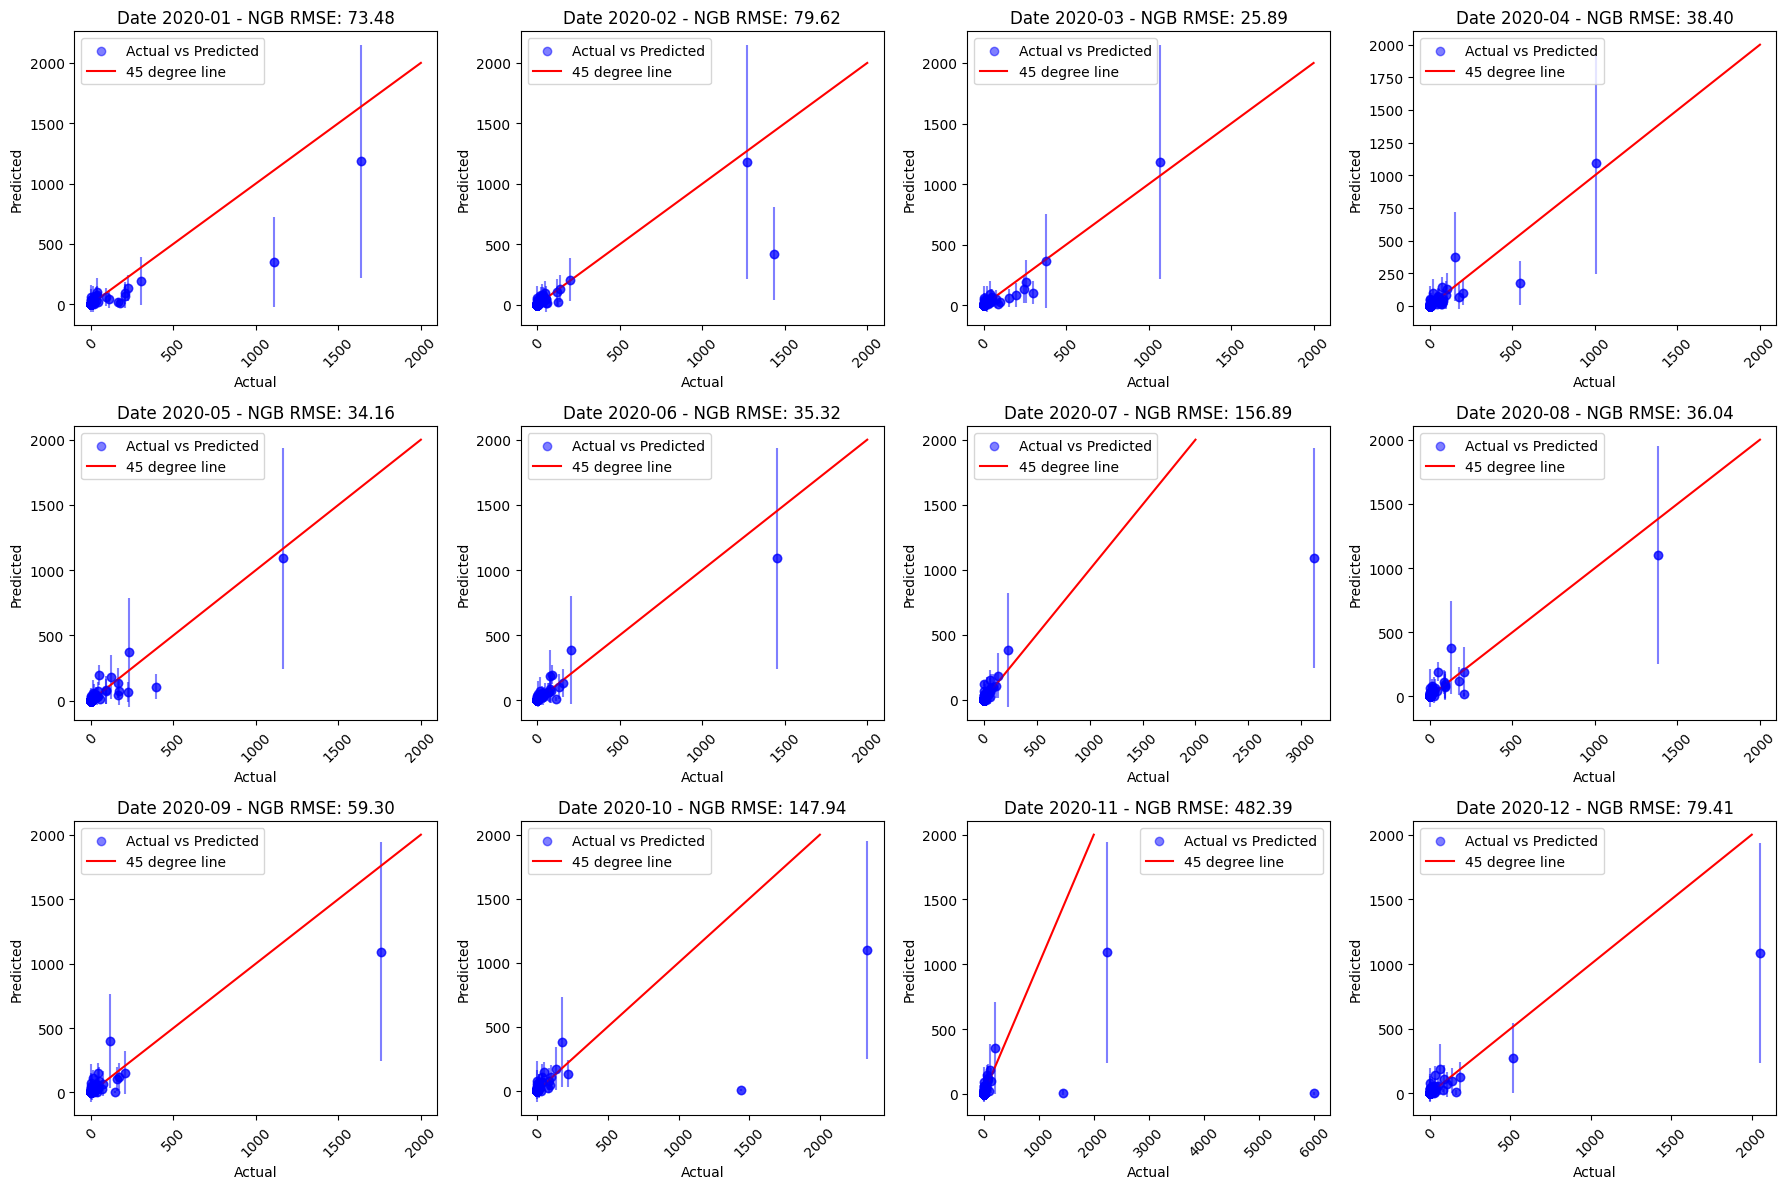

In [585]:
import matplotlib.pyplot as plt

# Assuming test_df is your DataFrame, and 'target' and 'predictions' are columns in it
unique_months = test_df['month_id'].unique()
n_months = len(unique_months)
print("Unique months:", unique_months)

# Calculate the grid size for the subplot (simple square root approximation for a square grid)
grid_size_x = int(n_months ** 0.5) + (1 if n_months % int(n_months ** 0.5) else 0)
grid_size_y = grid_size_x + 1

# print(f'Grid size: {grid_size}')
# Set overall figure size
plt.figure(figsize=(grid_size_x * 6, grid_size_y * 3))  # Adjust the size factors (6, 4) based on your preference

for index, month_id in enumerate(unique_months, start=1):
    this_month = test_df[test_df['month_id'] == month_id]
    mean_sq_error = sqrt(mean_squared_error(this_month[target], this_month['ngb_predictions']))
    current_date = this_month["date"].iloc[0]
    target_month = this_month[target]
    predictions_month = this_month['ngb_predictions']

    # Create subplot for current month
    plt.subplot(grid_size_x, grid_size_y, index)
    plt.scatter(target_month, predictions_month, color='blue', label='Actual vs Predicted', alpha=0.5)

    if PLOT_STD:
        predictions_std_month = this_month['ngb_predictions_std']
        plt.errorbar(target_month, predictions_month, yerr=predictions_std_month, fmt='o', color='blue', alpha=0.5)

    # print current_date in YY/MM format
    print_date = current_date.strftime('%Y-%m')
    plt.title(f'Date {print_date} - NGB RMSE: {mean_sq_error:.2f}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.plot([0, 2000], [0, 2000], color='red', label='45 degree line')
    plt.legend()
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [586]:
country_list = pd.read_csv('data/country_list.csv')
# get observations with the highest error
# calculate the error
test_df['error'] = abs(test_df[target] - test_df['ngb_predictions'])
temp_df = test_df.sort_values(by='error', ascending=False)
highest_error_indices = temp_df.head(10).index
del temp_df
# highest_error_indices

# get the highest error
highest_error = test_df.nlargest(30, 'error')
# drop columns that contain 'country_id_'
highest_error = highest_error[highest_error.columns.drop(list(highest_error.filter(regex='country_id_')))]
# add country name
highest_error = highest_error.merge(country_list, on='country_id')
highest_error
# from the test_df get sorted by highest, get the first 10 


,month_id,ged_sb,ged_ns,ged_os,acled_sb,acled_sb_count,acled_os,ged_sb_tsum_24,wdi_sp_pop_totl,ged_sb_tlag_1,...,splag_1_decay_ged_ns_5,y_shifted,ngb_predictions,date,country_id,country_name,ngb_predictions_std,error,id,name
0,476.0,0.0,0.0,0.0,0.0,369.0,0.0,29.0,9.939771e+06,1.0,...,0.000911,5991.0,2.421268,2020-11-01,126,Azerbaijan,8.216164,5988.578732,126,Azerbaijan
1,475.0,1.0,0.0,0.0,0.0,194.0,0.0,32.0,9.939771e+06,3.0,...,0.000937,1445.0,2.421268,2020-10-01,126,Azerbaijan,7.939105,1442.578732,126,Azerbaijan
2,472.0,2034.0,20.0,9.0,2220.0,684.0,50.0,46961.0,3.668678e+07,2430.0,...,0.332624,3115.0,1091.733472,2020-07-01,133,Afghanistan,847.877724,2023.266528,133,Afghanistan
3,475.0,3742.0,8.0,37.0,3443.0,1008.0,192.0,50924.0,3.668678e+07,2760.0,...,0.305017,2335.0,1098.463910,2020-10-01,133,Afghanistan,855.174251,1236.536090,133,Afghanistan
4,476.0,2616.0,36.0,116.0,3624.0,965.0,177.0,51323.0,3.668678e+07,3742.0,...,0.296334,2247.0,1091.733472,2020-11-01,133,Afghanistan,855.174251,1155.266528,133,Afghanistan
5,477.0,3603.0,0.0,20.0,4749.0,1234.0,163.0,53471.0,3.668678e+07,2616.0,...,0.287898,2051.0,1087.057045,2020-12-01,133,Afghanistan,847.877724,963.942955,133,Afghanistan
6,474.0,2760.0,0.0,21.0,2566.0,716.0,63.0,49647.0,3.668678e+07,2787.0,...,0.313955,1758.0,1091.733472,2020-09-01,133,Afghanistan,847.877724,666.266528,133,Afghanistan
7,466.0,2368.0,39.0,66.0,2688.0,687.0,163.0,41467.0,3.564342e+07,2301.0,...,0.395558,1638.0,1182.805301,2020-01-01,133,Afghanistan,968.103520,455.194699,133,Afghanistan
8,471.0,2430.0,21.0,14.0,2746.0,656.0,115.0,46370.0,3.668678e+07,1697.0,...,0.342370,1455.0,1091.733472,2020-06-01,133,Afghanistan,847.877724,363.266528,133,Afghanistan
9,473.0,2787.0,7.0,21.0,2478.0,619.0,157.0,47808.0,3.668678e+07,2034.0,...,0.323155,1380.0,1102.940386,2020-08-01,133,Afghanistan,847.877724,277.059614,133,Afghanistan


Max date in training set: 2018-09-01 00:00:00
Min date in test set: 2020-01-01 00:00:00
Expected min date in test set: 2020-01-01 00:00:00
Skipping Guyana as all actual are 0
Skipping Suriname as all actual are 0
Skipping Trinidad and Tobago as all actual are 0
Skipping Venezuela as all actual are 0
Skipping Argentina as all actual are 0
Skipping Bolivia as all actual are 0
Skipping Brazil as all actual are 0
Skipping Chile as all actual are 0
Skipping Ecuador as all actual are 0
Skipping Paraguay as all actual are 0
Skipping Uruguay as all actual are 0
Skipping Guatemala as all actual are 0
Skipping Mexico as all actual are 0
Skipping Barbados as all actual are 0
Skipping Dominican Republic as all actual are 0
Skipping Haiti as all actual are 0
Skipping Jamaica as all actual are 0
Skipping Costa Rica as all actual are 0
Skipping Cuba as all actual are 0
Skipping El Salvador as all actual are 0
Skipping Honduras as all actual are 0
Skipping Nicaragua as all actual are 0
Skipping Panama

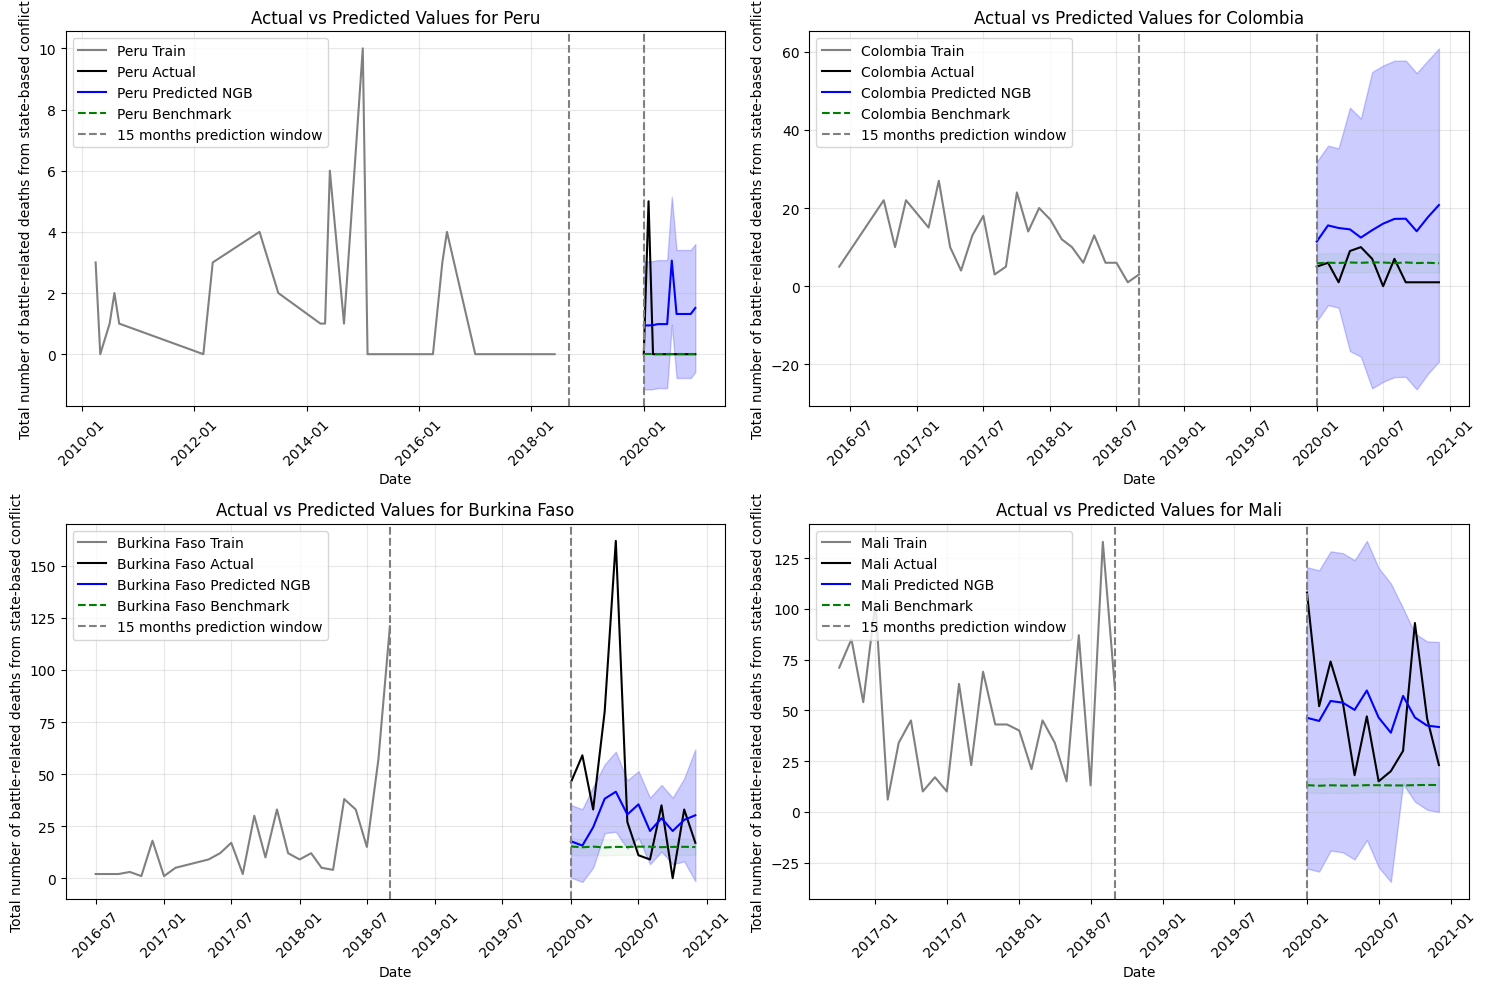

Skipping Senegal as all actual are 0
Skipping Sierra Leone as all actual are 0
Skipping The Gambia as all actual are 0
Skipping Djibouti as all actual are 0
Skipping Eritrea as all actual are 0
Skipping Mongolia as all actual are 0
Skipping Jordan as all actual are 0
Skipping Kazakhstan as all actual are 0
Skipping Norway as all actual are 0
Skipping Sweden as all actual are 0


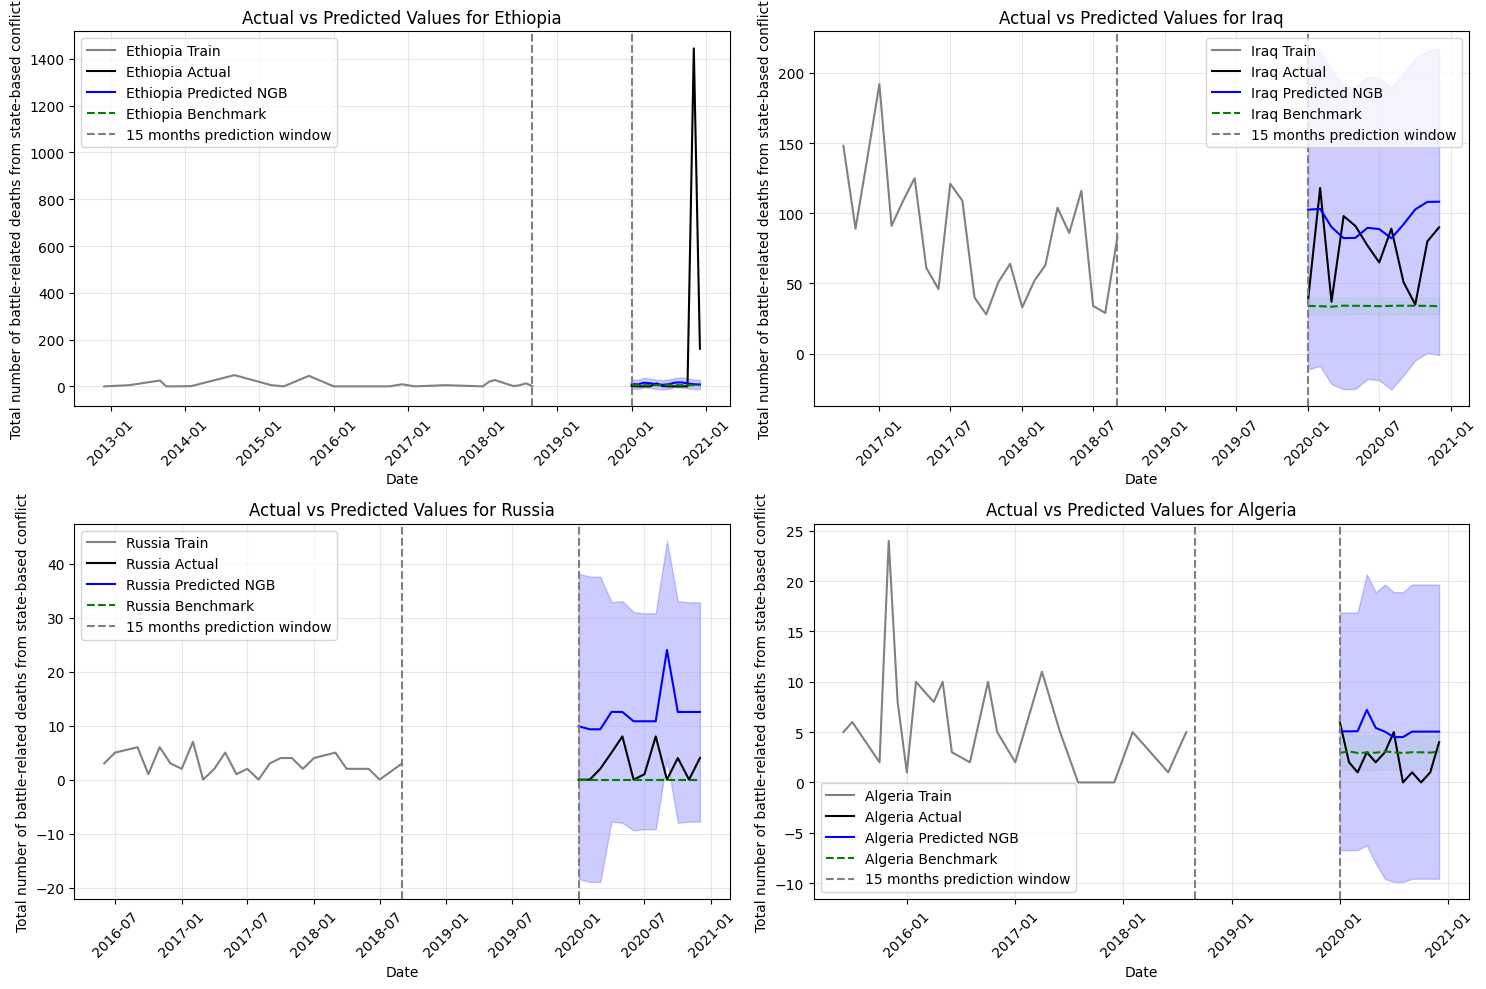

Skipping Benin as all actual are 0
Skipping Equatorial Guinea as all actual are 0


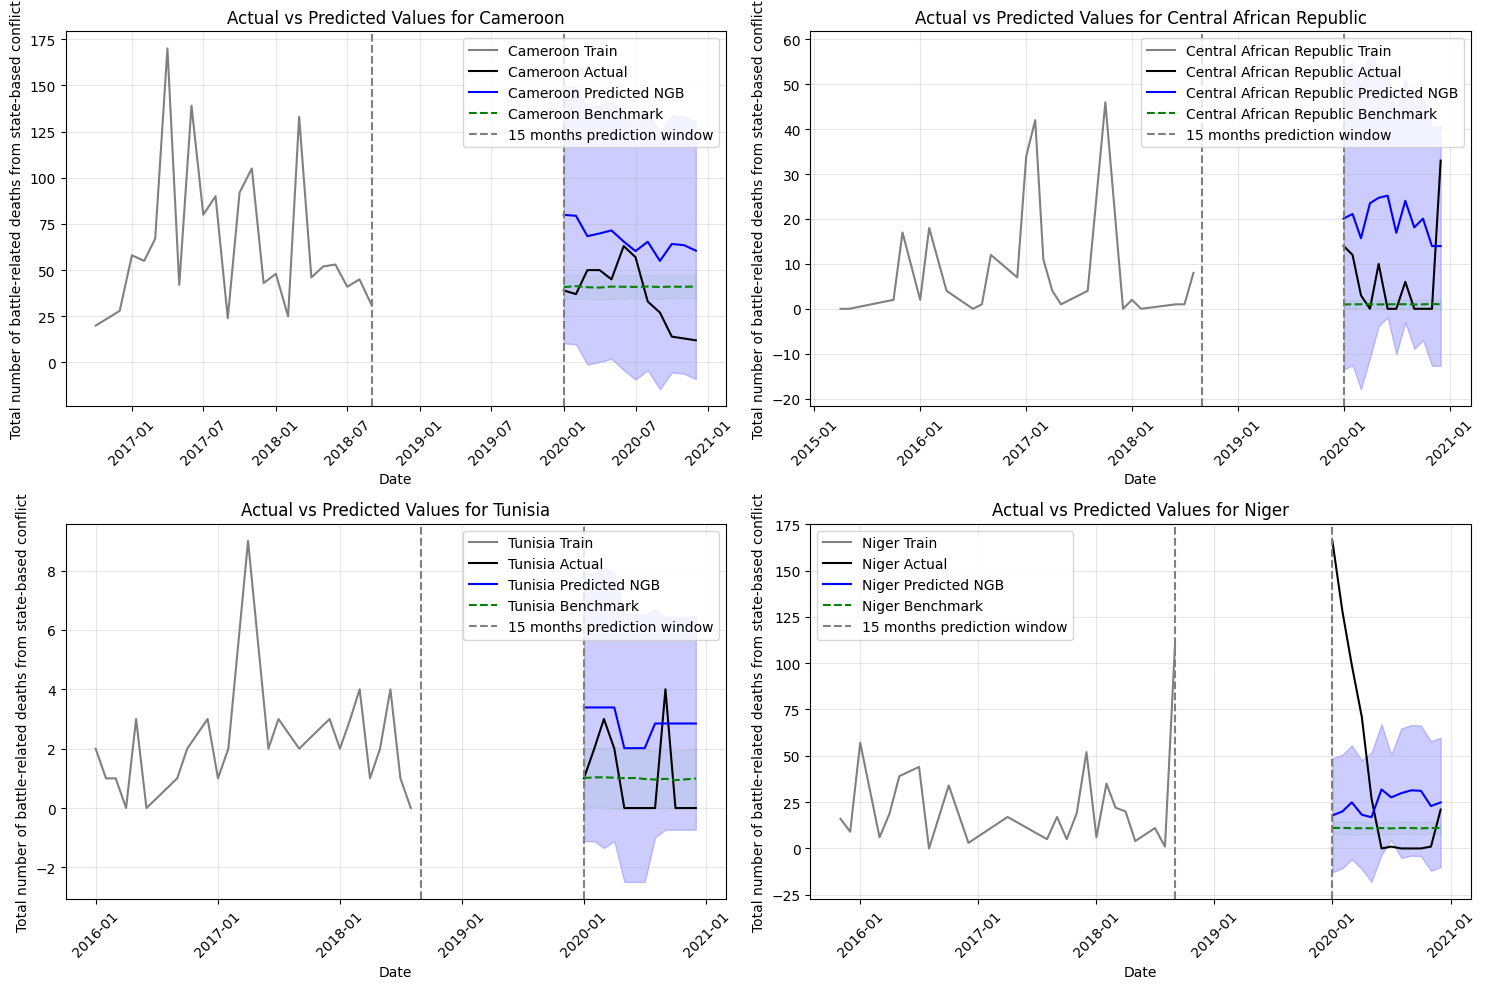

Skipping Togo as all actual are 0
Skipping Albania as all actual are 0
Skipping Bosnia and Herzegovina as all actual are 0
Skipping Croatia as all actual are 0
Skipping Italy as all actual are 0
Skipping Macedonia as all actual are 0
Skipping Malta as all actual are 0
Skipping Bulgaria as all actual are 0
Skipping Cyprus as all actual are 0
Skipping Georgia as all actual are 0
Skipping Greece as all actual are 0
Skipping Austria as all actual are 0
Skipping Czech Republic as all actual are 0
Skipping Denmark as all actual are 0
Skipping Hungary as all actual are 0
Skipping Poland as all actual are 0
Skipping Slovakia as all actual are 0
Skipping Slovenia as all actual are 0
Skipping Belgium as all actual are 0
Skipping France as all actual are 0
Skipping Luxembourg as all actual are 0
Skipping Netherlands as all actual are 0
Skipping Switzerland as all actual are 0
Skipping Belarus as all actual are 0
Skipping Estonia as all actual are 0
Skipping Finland as all actual are 0
Skipping La

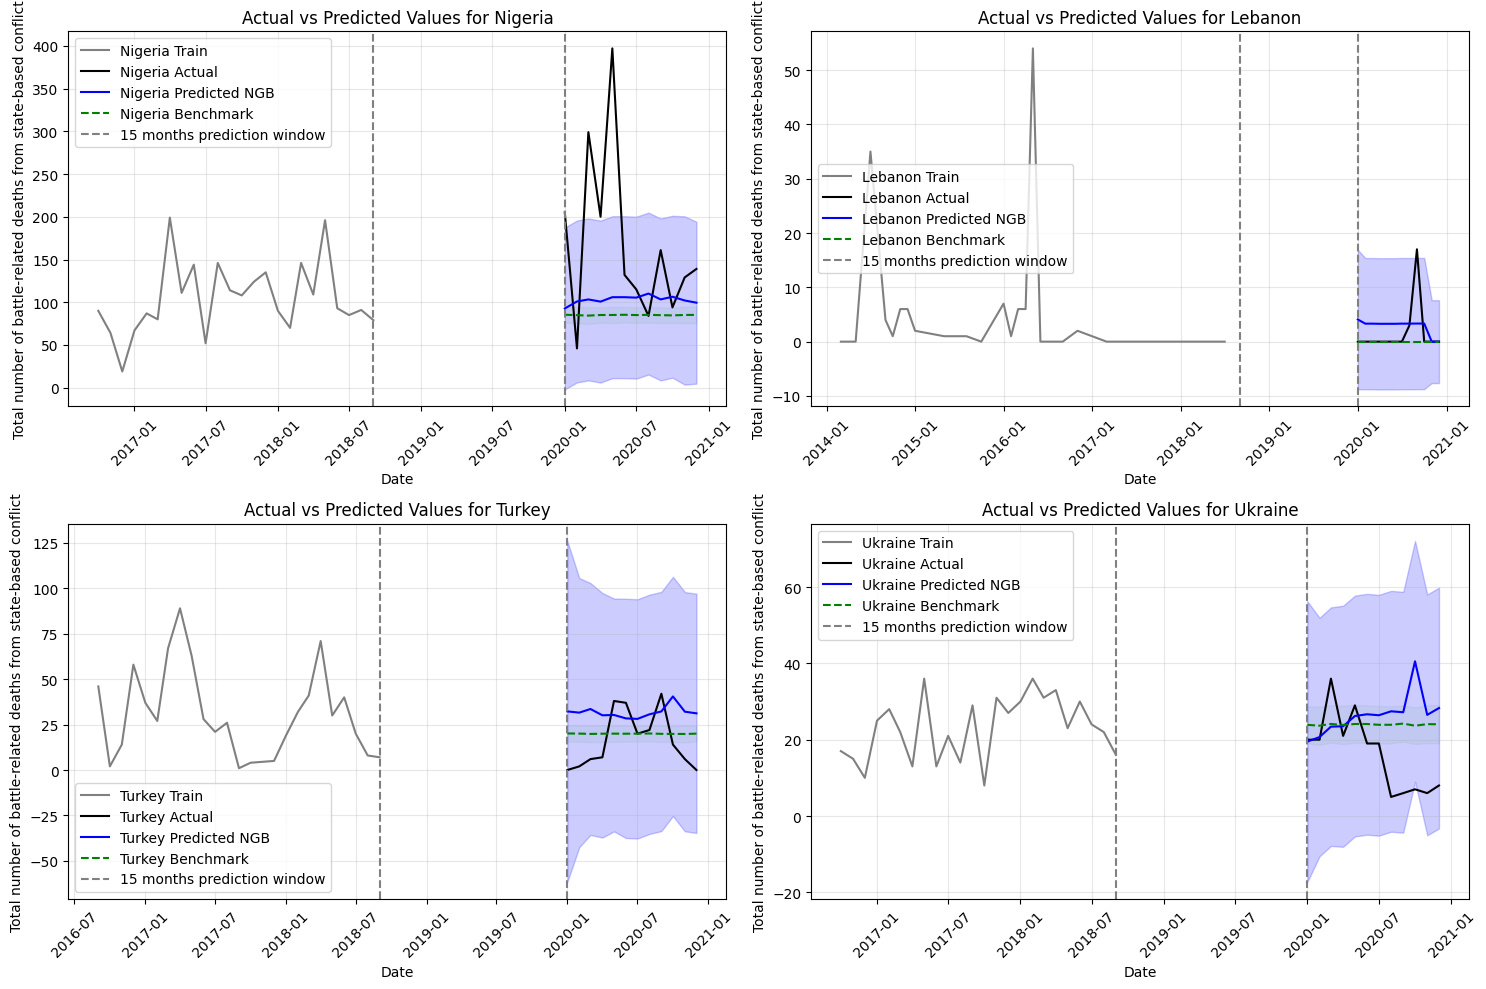

Skipping Maldives as all actual are 0
Skipping Oman as all actual are 0
Skipping Sri Lanka as all actual are 0
Skipping Turkmenistan as all actual are 0
Skipping Uzbekistan as all actual are 0


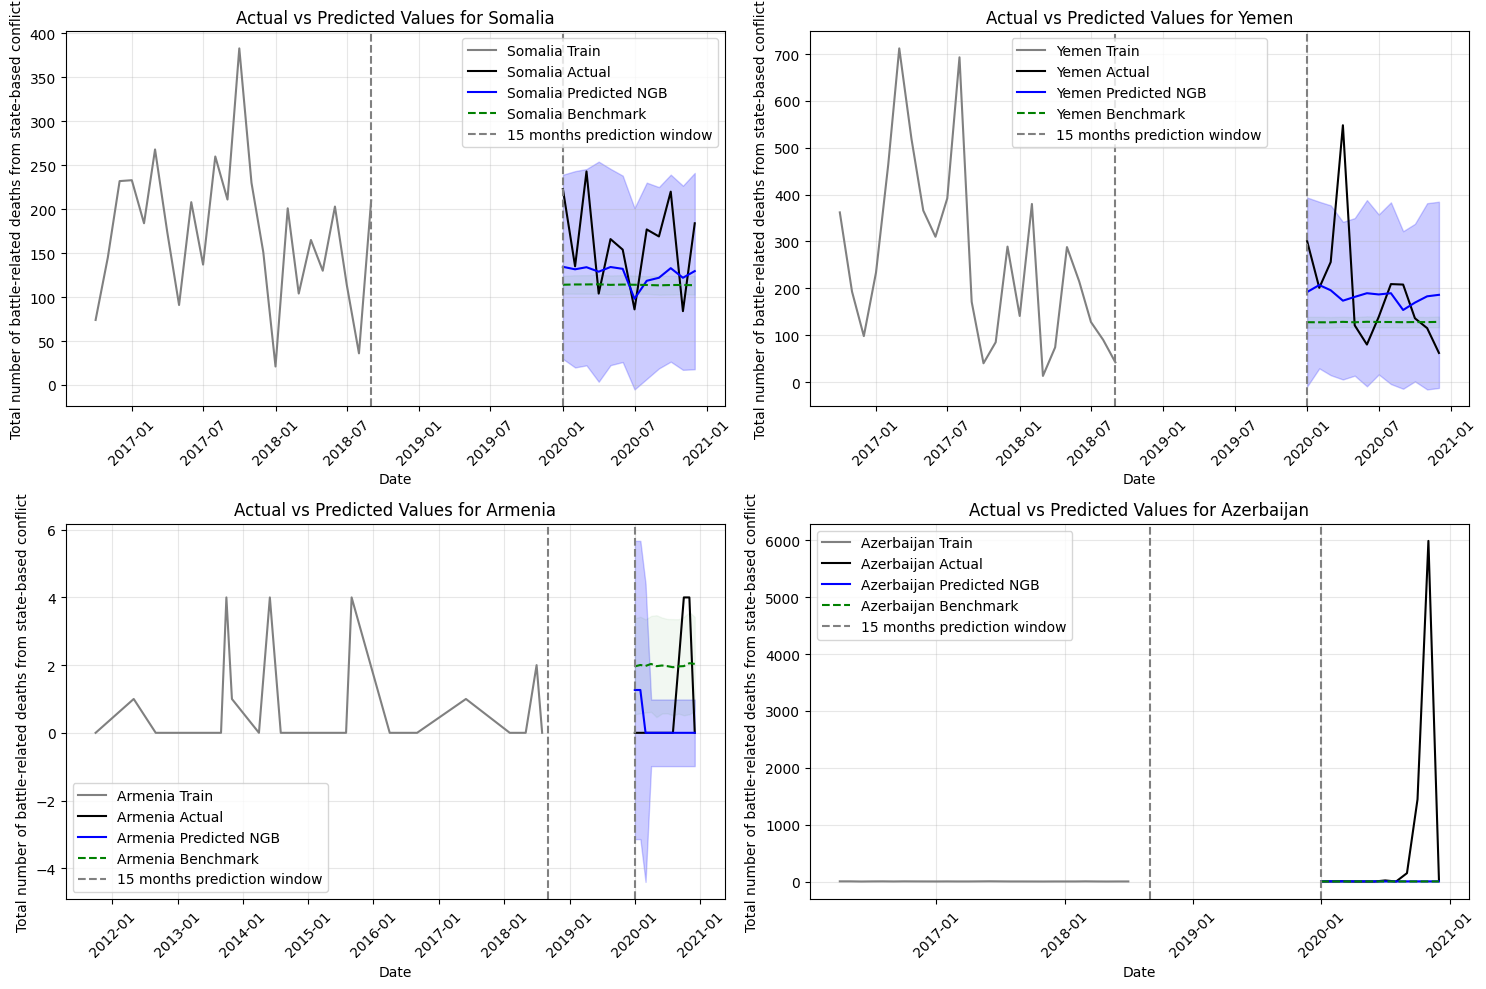

Skipping Bahrain as all actual are 0
Skipping Kuwait as all actual are 0
Skipping Qatar as all actual are 0
Skipping Saudi Arabia as all actual are 0
Skipping United Arab Emirates as all actual are 0
Skipping Kyrgyzstan as all actual are 0
Skipping Nepal as all actual are 0
Skipping Tajikistan as all actual are 0


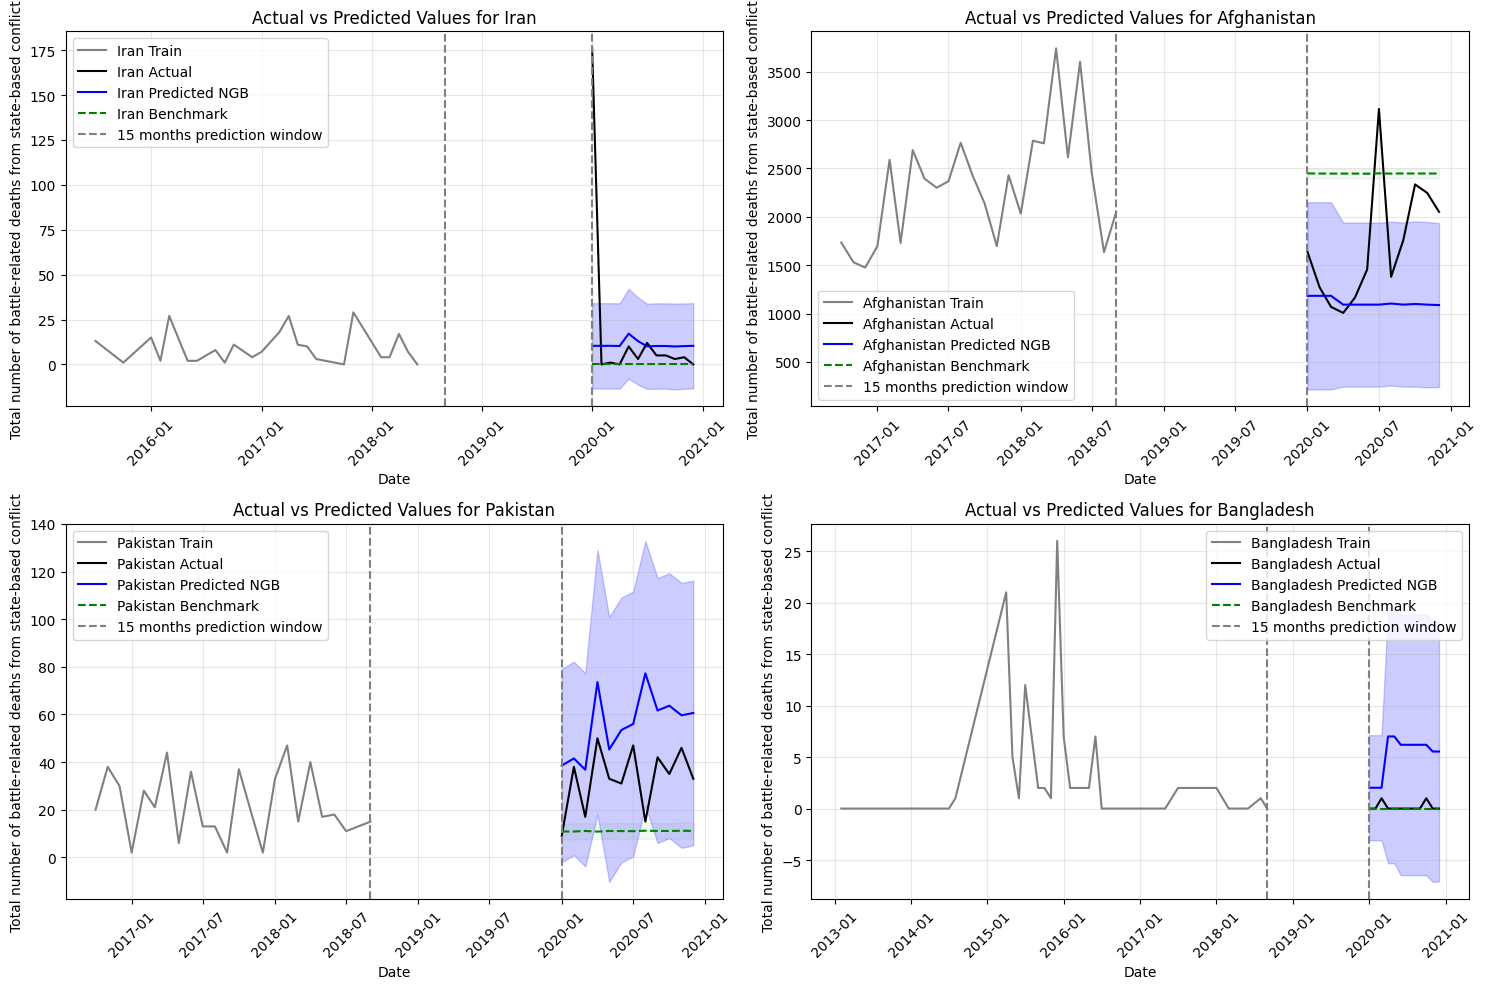

Skipping Bhutan as all actual are 0
Skipping Japan as all actual are 0
Skipping North Korea as all actual are 0
Skipping South Korea as all actual are 0
Skipping Cambodia as all actual are 0
Skipping Laos as all actual are 0
Skipping Vietnam as all actual are 0
Skipping Botswana as all actual are 0


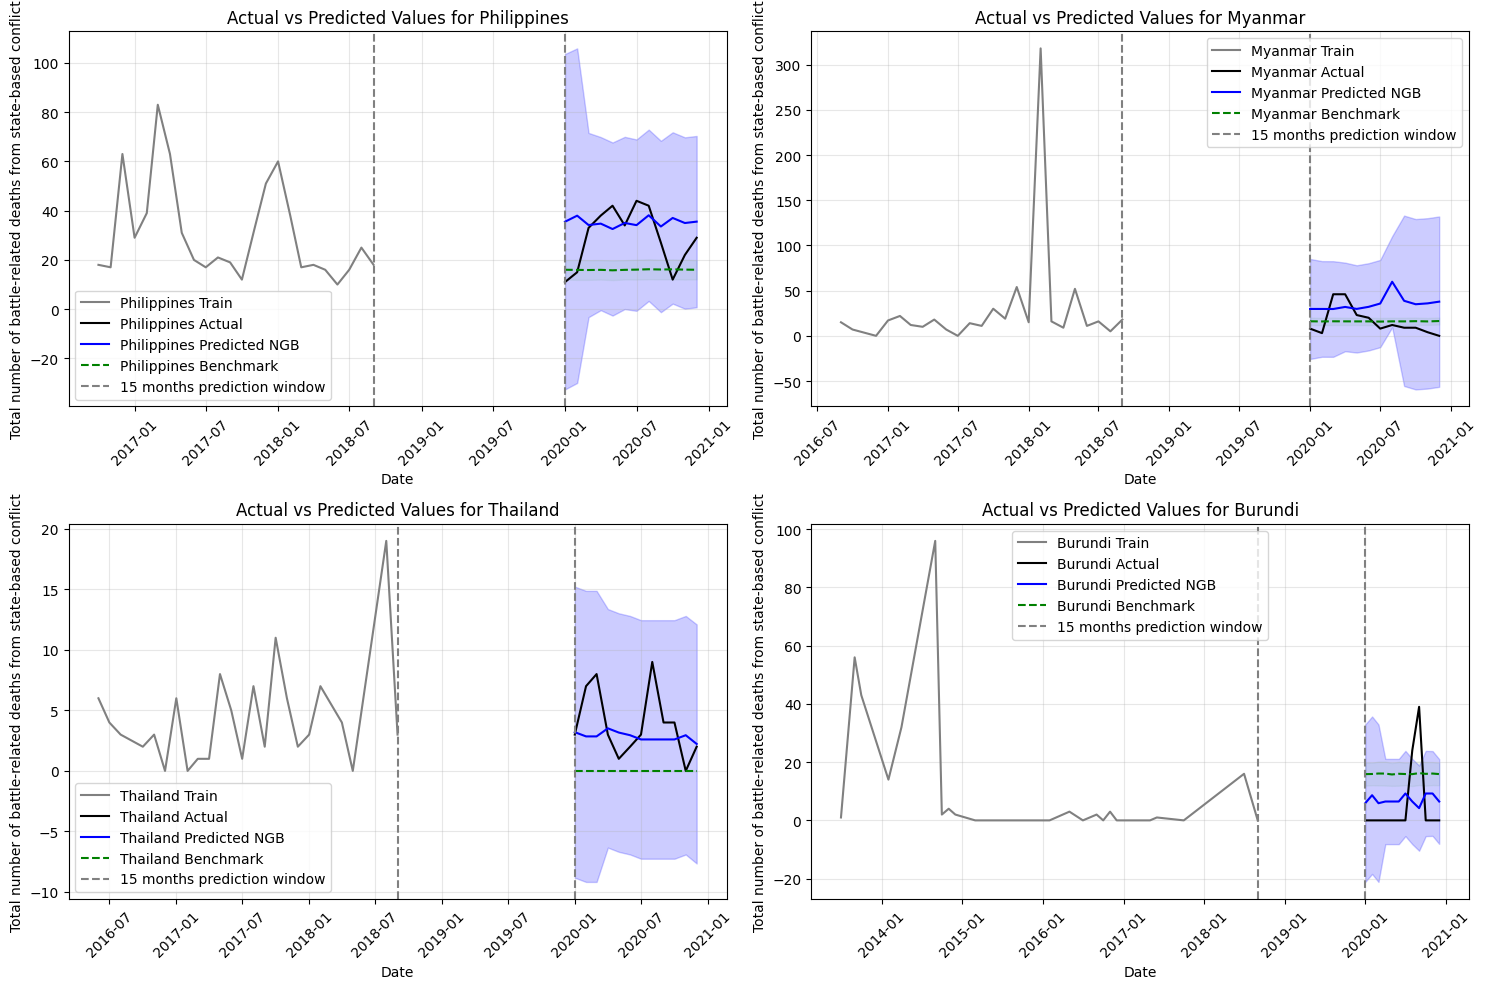

Skipping Rwanda as all actual are 0
Skipping Zambia as all actual are 0
Skipping Zimbabwe as all actual are 0
Skipping Comoros as all actual are 0
Skipping Lesotho as all actual are 0
Skipping Malawi as all actual are 0
Skipping South Africa as all actual are 0
Skipping Swaziland as all actual are 0
Skipping Congo as all actual are 0
Skipping Fiji as all actual are 0
Skipping Gabon as all actual are 0
Skipping Namibia as all actual are 0
Skipping New Zealand as all actual are 0
Skipping Madagascar as all actual are 0
Skipping Mauritius as all actual are 0
Skipping Timor Leste as all actual are 0
Skipping Australia as all actual are 0
Skipping Papua New Guinea as all actual are 0
Skipping Solomon Is. as all actual are 0
Skipping Canada as all actual are 0
Skipping Germany as all actual are 0
Skipping China as all actual are 0
Skipping Malaysia as all actual are 0
Skipping Singapore as all actual are 0


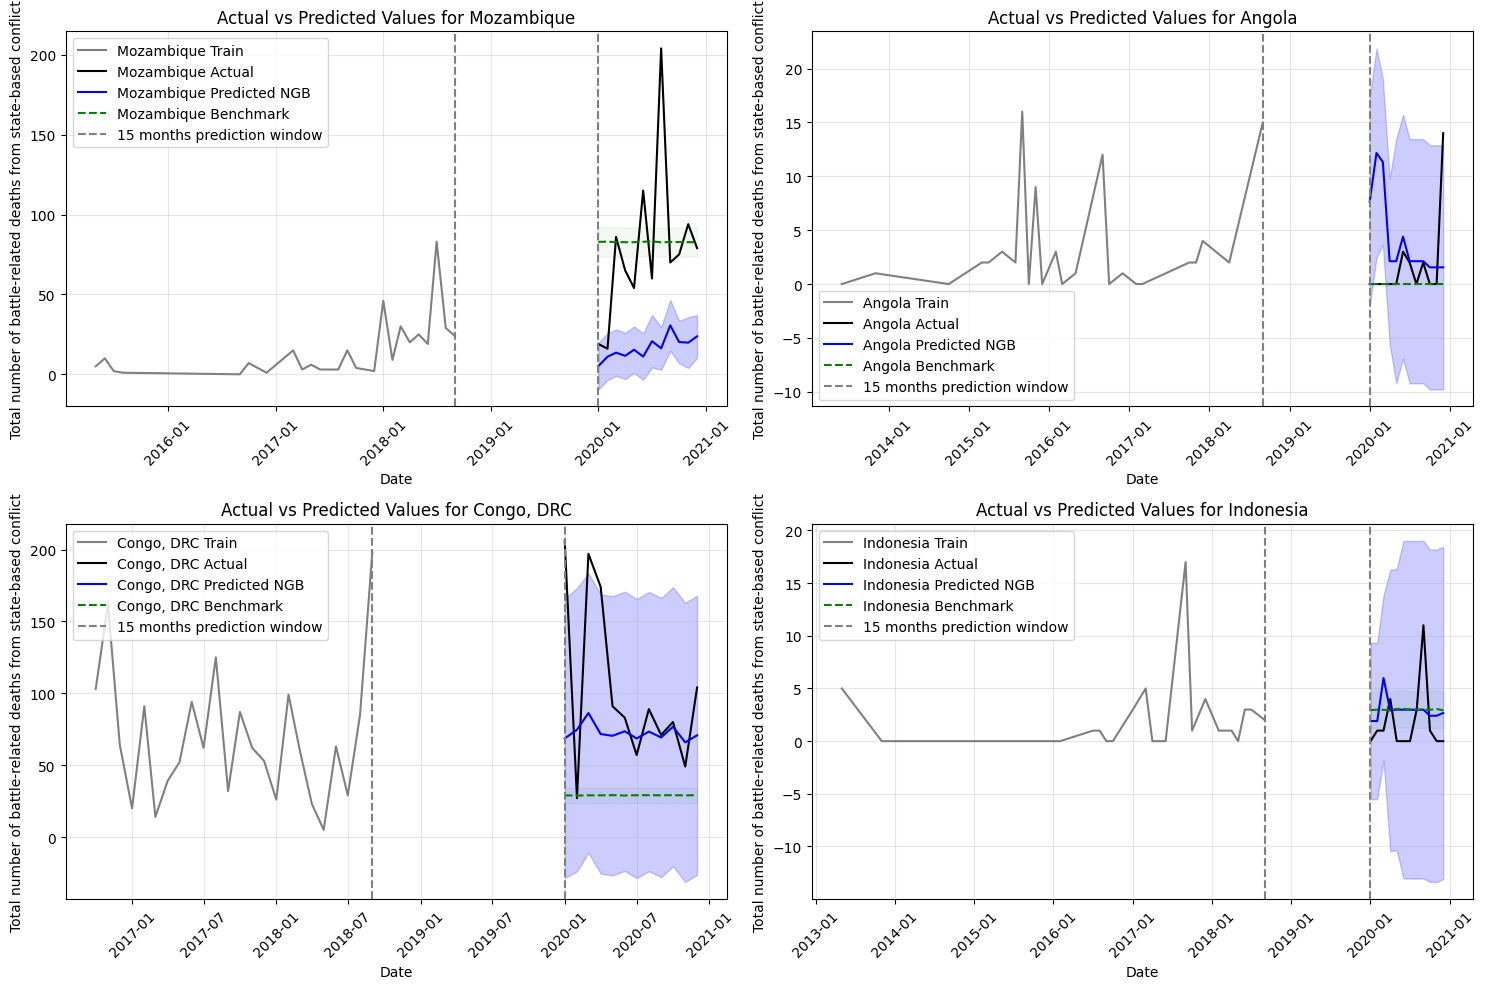

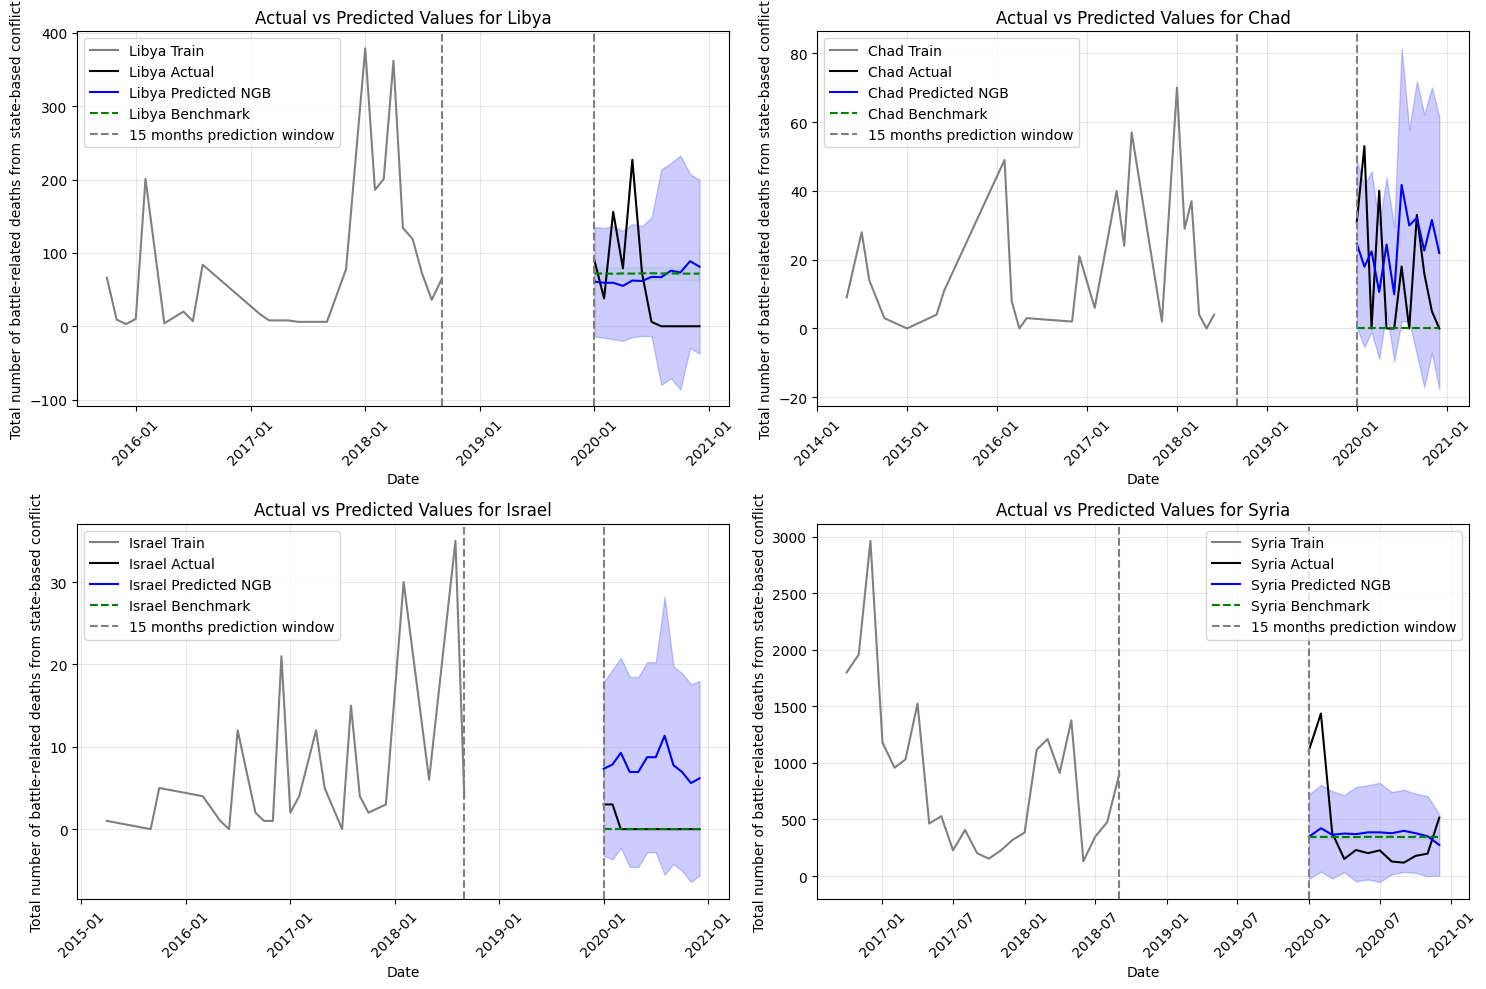

Skipping Montenegro as all actual are 0
Skipping Serbia as all actual are 0
Skipping United States as all actual are 0
Skipping Uganda as all actual are 0


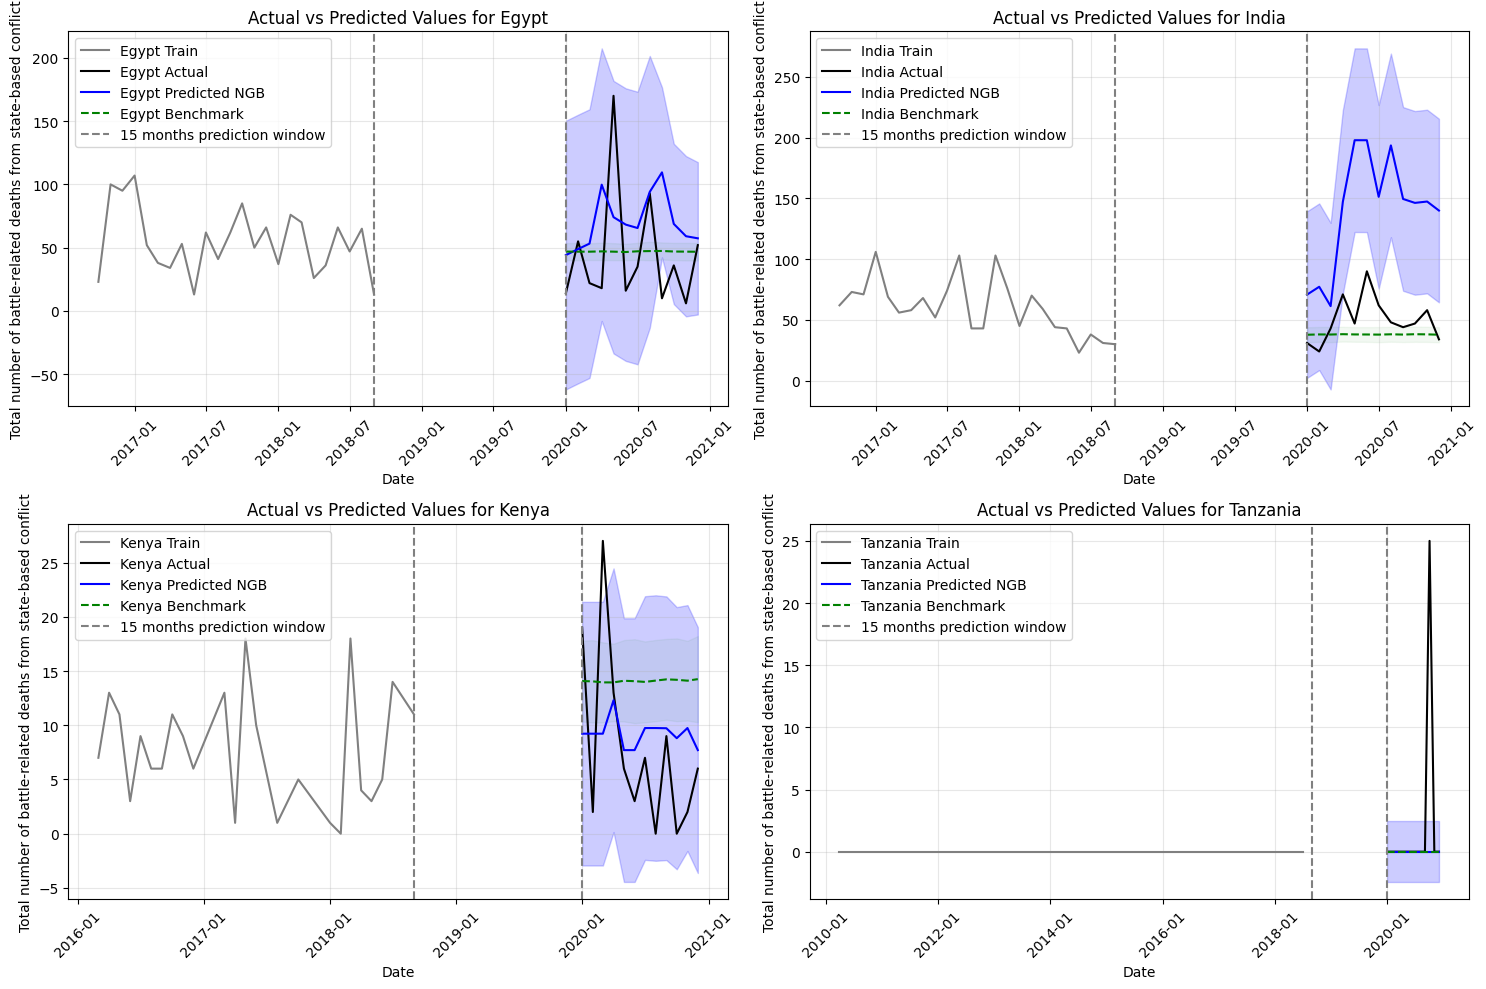

Skipping Mauritania as all actual are 0


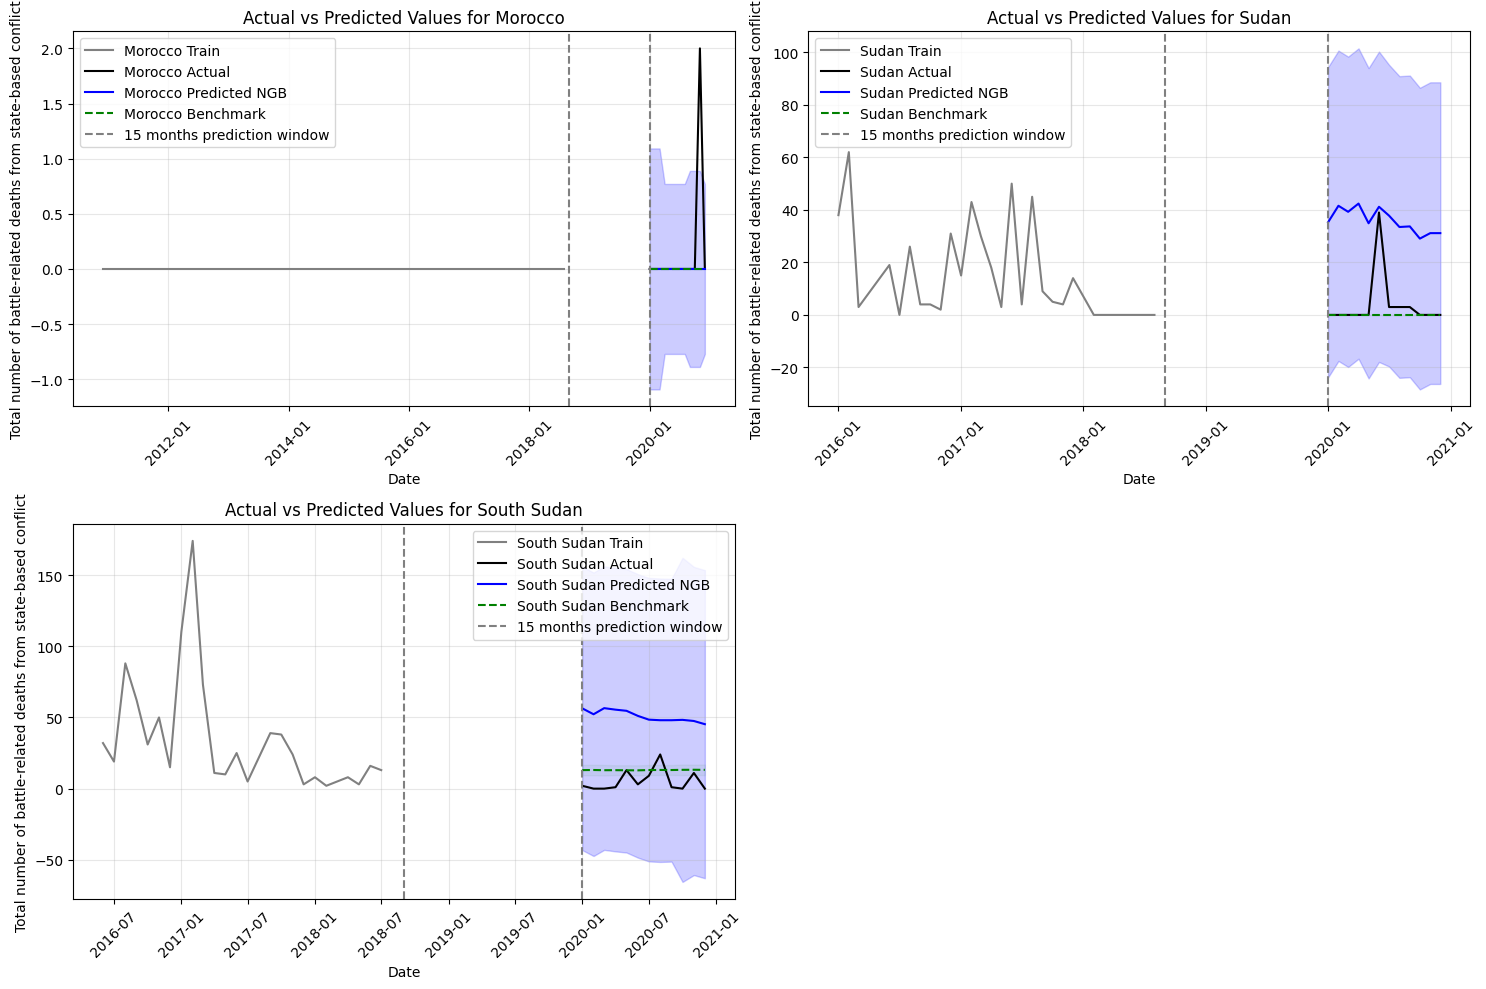

<Figure size 1500x1000 with 0 Axes>

In [587]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

# Load data
country_list = pd.read_csv('data/country_list.csv')
country_ids = test_df['country_id'].unique().tolist()

# Settings
num_plots_per_figure = 4

plt.figure(figsize=(15, 10))  # New figure
plots_added = 0
# Continue looping until all countries have been considered
max_date_train = pd.to_datetime(train_df['date'].max())
min_date_test = pd.to_datetime(test_df['date'].min())
# 1 year buffer because of validation set
expected_min_date_test = max_date_train + relativedelta(years=1 if CREATE_VAL_DS else 0,
                                                        months=15 + 1)  # 15 is window size + 1 is from Sep to Oct
print(f"Max date in training set: {max_date_train}")
print(f"Min date in test set: {min_date_test}")
print(f"Expected min date in test set: {expected_min_date_test}")
# assert the different is exactly 15 months
assert min_date_test == expected_min_date_test

for index, country_id in enumerate(country_ids):

    this_country_test = test_df[test_df['country_id'] == country_id]
    this_country_train = train_df[train_df['country_id'] == country_id]
    # get last 24 months for this_country_train
    this_country_train = this_country_train.tail(24)

    country_name = country_list[country_list['country_id'] == country_id]['name'].values[0]

    # Check if country should be skipped due to no data
    if this_country_test[target].sum() == 0:
        print(f"Skipping {country_name} as all actual are 0")
        continue

    # Prepare the subplot for non-skipped countries
    plt.subplot(2, 2, plots_added + 1)

    # Plotting data
    plt.plot(this_country_train['date'], this_country_train[target], label=f'{country_name} Train', color='gray',
             linestyle='-', marker='')
    plt.plot(this_country_test['date'], this_country_test[target], label=f'{country_name} Actual', color='black',
             linestyle='-', marker='')
    # plt.plot(this_country_test['date'], this_country_test['predictions'], label=f'{country_name} Predicted XGB',
    #          color='red', linestyle='-', marker='')
    plt.plot(this_country_test['date'], this_country_test['ngb_predictions'], label=f'{country_name} Predicted NGB',
             color='blue', linestyle='-', marker='')
    # plot std
    if PLOT_STD:
        month_max_pred = this_country_test['ngb_predictions']
        if not normal_enabled:
            plt.fill_between(this_country_test['date'],
                             this_country_test['ngb_predictions_min'],
                             this_country_test['ngb_predictions_max'],
                             color='blue',
                             alpha=0.2)
        else:
            plt.fill_between(this_country_test['date'],
                             this_country_test['ngb_predictions'] - this_country_test['ngb_predictions_std'],
                             this_country_test['ngb_predictions'] + this_country_test['ngb_predictions_std'],
                             color='blue',
                             alpha=0.2)

    # plt.plot([max_date_train, min_date_test], [-0, -0], color='gray', linestyle='-', marker='', alpha=0.5,
    #          label='15 months prediction window')

    # Benchmark plotting
    benchmark_country = benchmark_model[benchmark_model['country_id'] == country_id]
    plt.plot(benchmark_country['date'], benchmark_country['outcome'], label=f'{country_name} Benchmark',
             color='green', linestyle='--', marker='')
    plt.fill_between(benchmark_country['date'], benchmark_country['outcome'] - benchmark_country['outcome_std'],
                     benchmark_country['outcome'] + benchmark_country['outcome_std'], color='green', alpha=0.05)

    # Adding title and labels
    plt.title(f"Actual vs Predicted Values for {country_name}")
    plt.xlabel("Date")
    # turn dates 90 degrees
    plt.xticks(rotation=45)
    # make ticks more readable
    plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%Y-%m"))
    # add vertical lines for the training and testing split
    plt.axvline(x=min_date_test, color='gray', linestyle='--', label='15 months prediction window')
    plt.axvline(x=max_date_train, color='gray', linestyle='--')
    plt.ylabel("Total number of battle-related deaths from state-based conflict")
    plt.legend()
    # add light grid
    plt.grid(alpha=0.3)

    # Increment counters
    plots_added += 1

    if plots_added % num_plots_per_figure == 0 or index == len(country_ids) - 1:
        # Adjust layout and display the figure
        plt.tight_layout()
        plt.show()
        plt.figure(figsize=(15, 10))  # New figure
        plots_added = 0

plt.show()


In [588]:
import plotly.graph_objects as go

PLOT_ONE_FIGURE = False
if PLOT_ONE_FIGURE:
    # Assuming country_list, test_df, and train_df are already loaded
    # Creating one figure for all countries
    fig = go.Figure()

    country_ids = test_df['country_id'].unique().tolist()

    for country_id in country_ids:
        # Data for this country
        this_country_test = test_df[test_df['country_id'] == country_id]
        this_country_train = train_df[train_df['country_id'] == country_id]
        country_name = country_list[country_list['country_id'] == country_id]['name'].values[0]

        # Add traces for Train Actual
        fig.add_trace(
            go.Scatter(x=this_country_train['date'], y=this_country_train[target], name=f'{country_name} Train',
                       mode='lines', line=dict(color='gray', width=1))
        )

        # Add traces for Test Actual
        fig.add_trace(
            go.Scatter(x=this_country_test['date'], y=this_country_test[target], name=f'{country_name} Test Actual',
                       mode='lines', line=dict(color='blue', width=1))
        )

        # Add traces for Predicted
        fig.add_trace(
            go.Scatter(x=this_country_test['date'], y=this_country_test['predictions'],
                       name=f'{country_name} Predicted', mode='lines', line=dict(color='red', dash='dot', width=1))
        )

    # Add figure title and adjust layout
    fig.update_layout(
        title_text="Actual vs Predicted Values Across Countries",
        xaxis_title="Date",
        yaxis_title="GED_SB Value",
        legend_title="Legend",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
    )

    # Show plot
    fig.show()

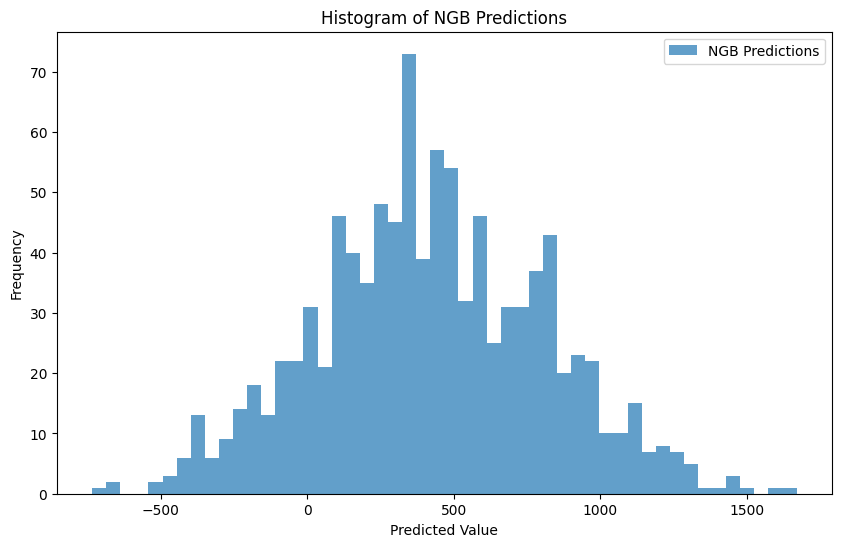

In [589]:
ngb_predictions_sampled = ngb_predictions_dist.sample(1000).T.astype(int)
# 
# concat to test_df
# test_df = pd.concat([test_df, ngb_predictions_sampled], axis=1)


# negative_mask = ngb_predictions_sampled < 0
# # print how many negative values are there
# print(negative_mask.sum().sum()) # 917442
# # print total number of values
# print(negative_mask.size) # 2028000
# # print percentage of negative values
# print(negative_mask.sum().sum() / negative_mask.size) #0.452387573964497
# # sample once more and fill in the previous negative values with values from new distribution
# ngb_predictions_sampled[negative_mask] = ngb_predictions_dist.sample(1000).T[negative_mask]
# # print again how many negative values are there
# negative_mask =  ngb_predictions_sampled < 0
# print(negative_mask.sum().sum())  # 423012

# # set 0 if negative
# # ngb_predictions_sampled = ngb_predictions_sampled.clip(min=0)
# ngb_predictions_sampled = ngb_predictions_sampled
# 
# 
# # plot histogram of the sampled predictions using plt
plt.figure(figsize=(10, 6))
plt.hist(ngb_predictions_sampled[325], bins=50, alpha=0.7, label='NGB Predictions')  # MAX
# plot a dot for the actual value
# plt.scatter([actuals_model['ged_sb'].max()], [0], color='red', label='Actual Value')
# plt.hist(ngb_predictions_sampled[20], bins=50, alpha=0.7, label='NGB Predictions') # MIN
plt.title('Histogram of NGB Predictions')
plt.xlabel('Predicted Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# ngb_predictions_sampled[0]

In [590]:

# len(set(benchmark_model['country_id'].unique()) - set(test_df['country_id'].unique()))
print(benchmark_model['month_id'].unique())
print(test_df['month_id'].unique())
print("Adjusted month_id for predictions:", test_df['month_id'].unique() + 15)
set(benchmark_model['month_id'].unique()) == set(test_df['month_id'].unique() + 15)

[481 482 483 484 485 486 487 488 489 490 491 492]
[466. 467. 468. 469. 470. 471. 472. 473. 474. 475. 476. 477.]
Adjusted month_id for predictions: [481. 482. 483. 484. 485. 486. 487. 488. 489. 490. 491. 492.]


True

In [591]:
test_df.index

RangeIndex(start=0, stop=2028, step=1)

In [592]:
# temp = test_df
# temp.reset_index(inplace=False, drop=False)
# 
# # get row with the highest number of deaths
# temp[temp['predictions'] == temp['predictions'].max()]
# print(temp[temp['predictions'] == temp['predictions'].min()])

# NOTE !!!!
# test_df.reset_index(inplace=True, drop=True)
test_df_edge = test_df.shape[1]
test_df_new = pd.concat([test_df, pd.DataFrame(ngb_predictions_sampled)], axis=1)
ngb_predictions_sampled[12] == test_df_new.iloc[12, test_df_edge:]

# get the row with the highest number of deaths
# actuals_model


# add to test_df_new the actuals based on month_id and country_id
# actuals_model.rename(columns={'ged_sb': 'actuals'}, inplace=True)
# test_df_new.merge(actuals_model[['month_id', 'country_id', 'actuals']], on=['month_id', 'country_id'])

# drop level 0 and index columns
# test_df.drop(columns=['level_0', 'index'], inplace=True, errors='ignore')
# test_df_new

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: 12, Length: 1000, dtype: bool

In [593]:
# actuals_model.rename(columns={'ged_sb': 'actuals'}, inplace=True)
# actuals_model.set_index(['month_id', 'country_id'], inplace=True)
# test_df_new.set_index(['month_id', 'country_id'], inplace=True)

In [594]:
# actuals_model.rename(columns={'ged_sb': 'actuals'}, inplace=True)
# test_df_new.reset_index(inplace=True, drop=True)
# actuals_model.reset_index(inplace=True, drop=True)


# drop actuals if it exists
# test_df_new = test_df_new.drop(columns='actuals', errors='ignore')

# join actuals to test_df_new
# test_df_new = test_df_new.join(actuals_model['actuals'], how='left')
# test_df_new.reset_index(inplace=True)
# actuals_model.reset_index(inplace=True)
# test_df_new
# actuals_model['actuals']
# test_df_new.head(10)
# test_df_new.head(1000)

In [595]:
print(list(test_df_new.columns).index(target))
print(len(test_df_new.columns))
print(test_df_edge)
test_df_new.head(100)[['month_id', 'country_id', target, 'ngb_predictions']]

126
1301
301


,month_id,country_id,y_shifted,ngb_predictions
0,466.0,1,0.0,0.902041
1,466.0,2,0.0,0.000000
2,466.0,3,0.0,0.121847
3,466.0,4,0.0,4.999363
4,466.0,7,0.0,0.014304
...,...,...,...,...
95,466.0,121,0.0,3.835493
96,466.0,122,0.0,1.751255
97,466.0,123,0.0,0.130978
98,466.0,124,301.0,192.002664


In [596]:
# test_df_edge = test_df_new.shape[1]
# test_df_new = pd.concat([test_df_new, pd.DataFrame(ngb_predictions_sampled)], axis=1)
# ngb_predictions_sampled[1] == test_df_new.iloc[1, test_df_edge:]

In [597]:
# get id of test_df_new[target].max()
indices_to_plot = [test_df_new[target].idxmax(), test_df_new[target].idxmin()]
indices_to_plot.extend(highest_error_indices)

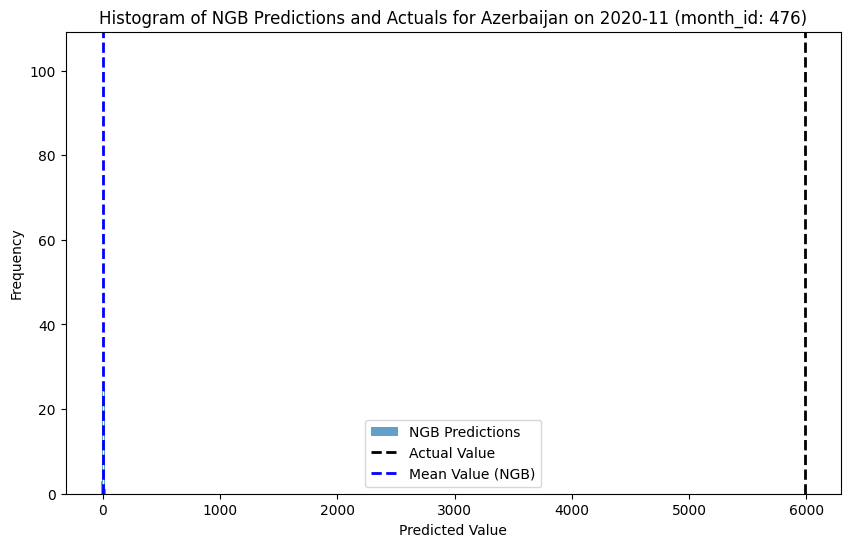

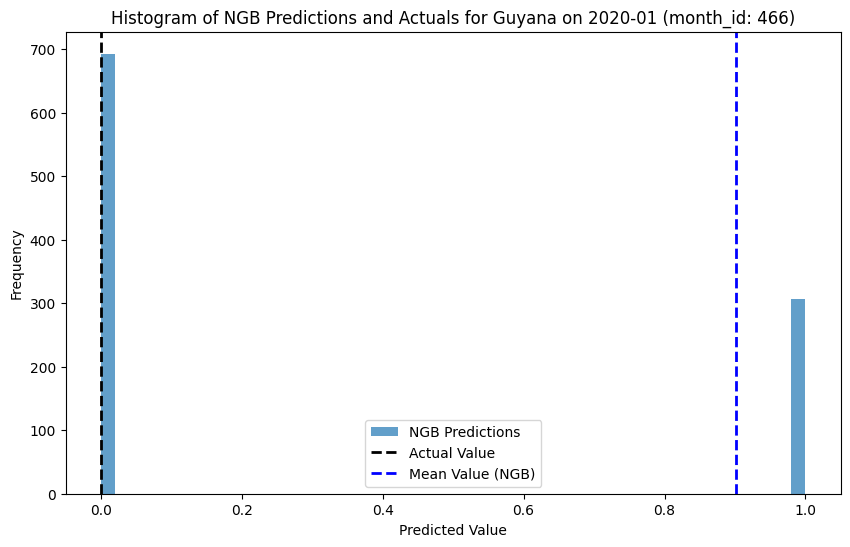

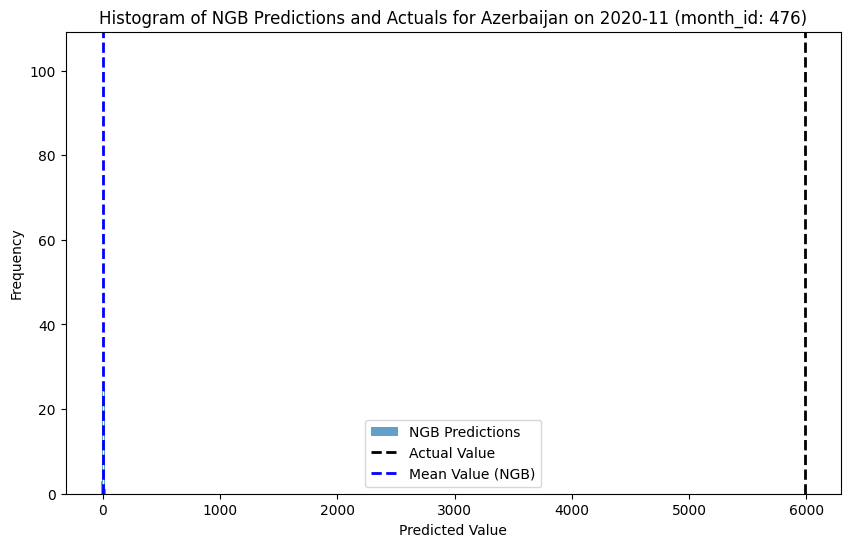

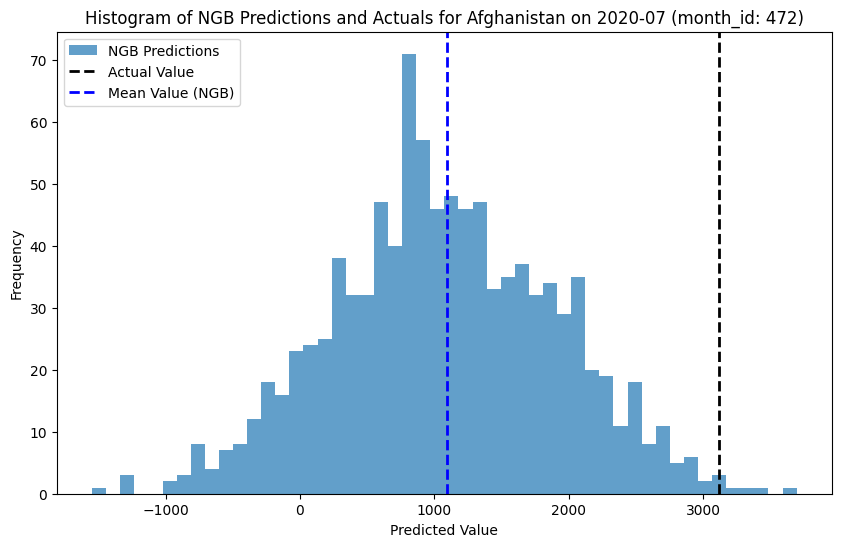

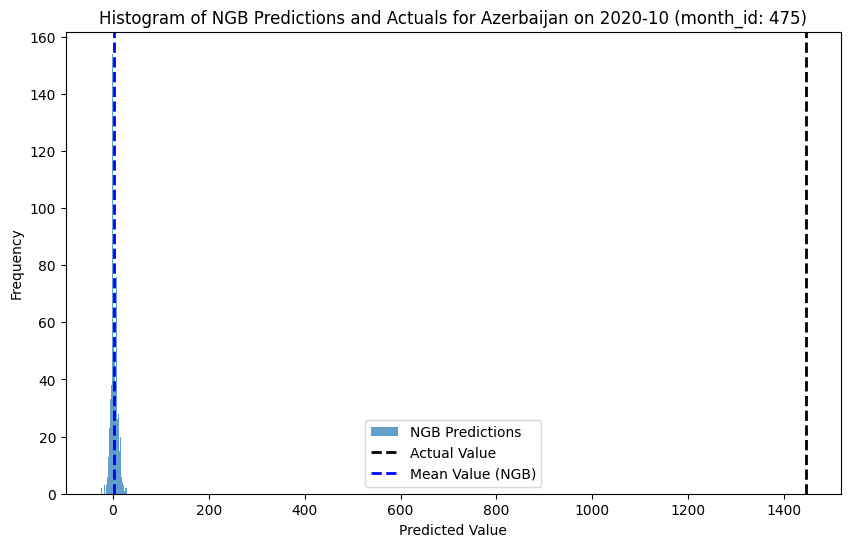

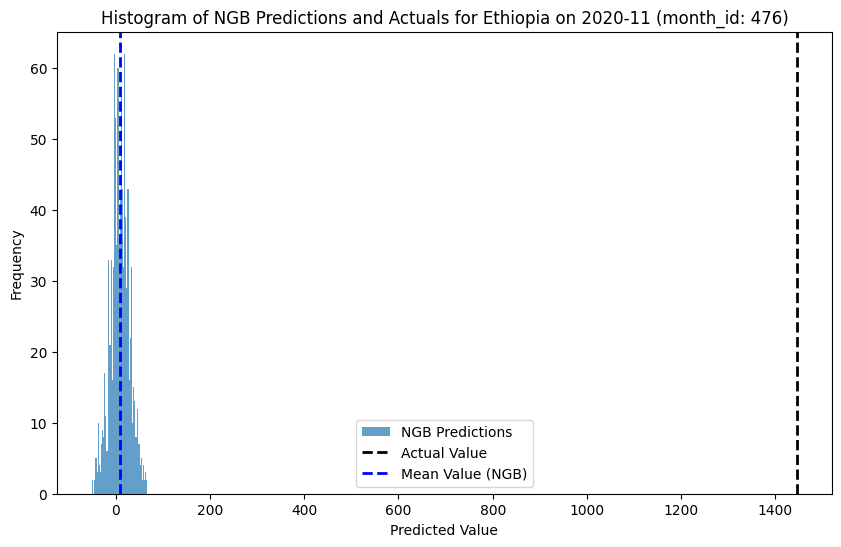

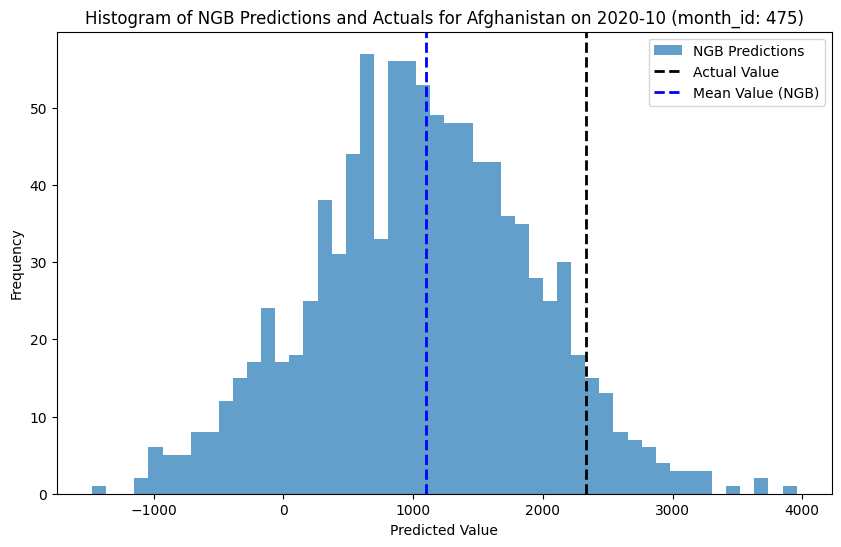

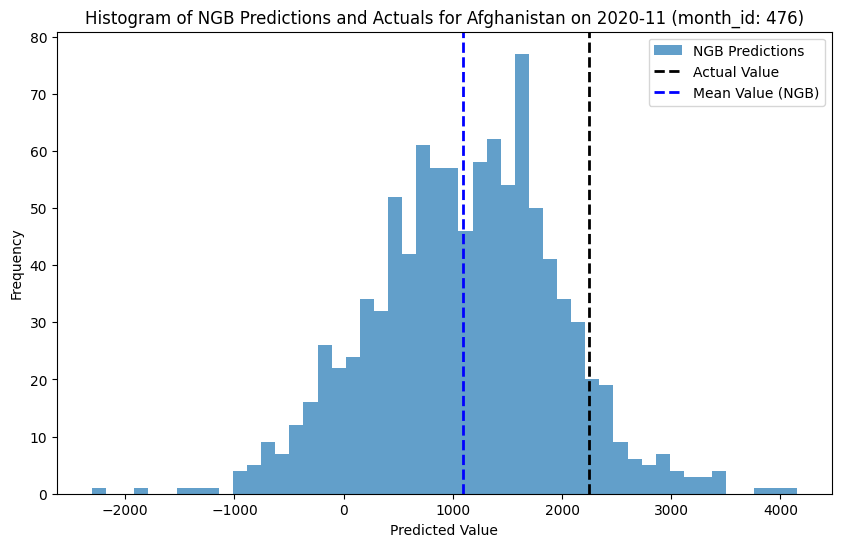

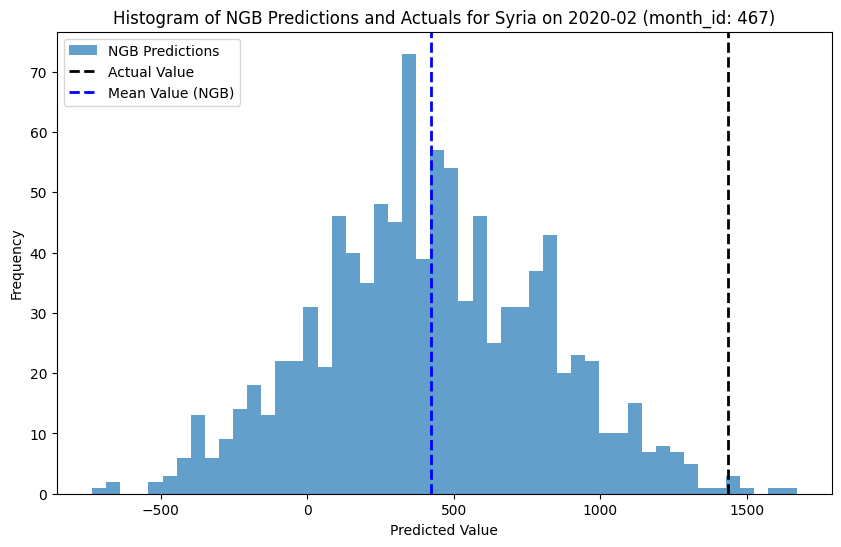

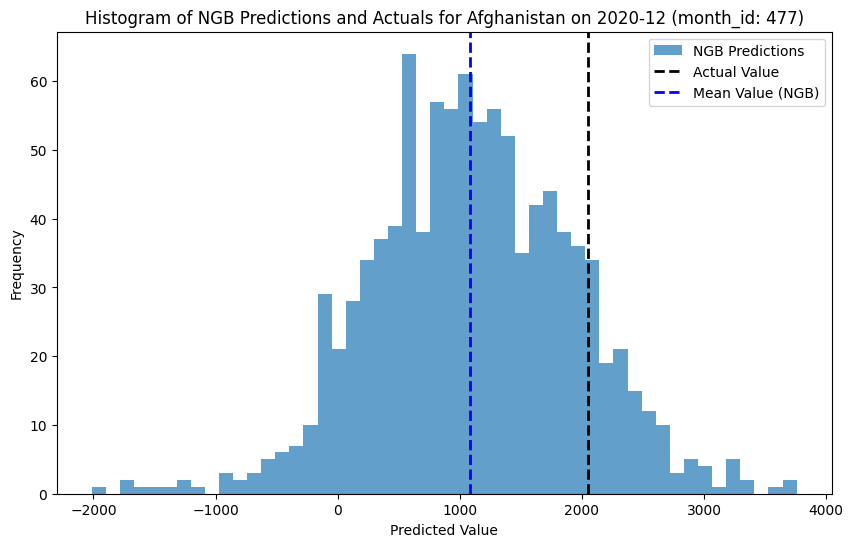

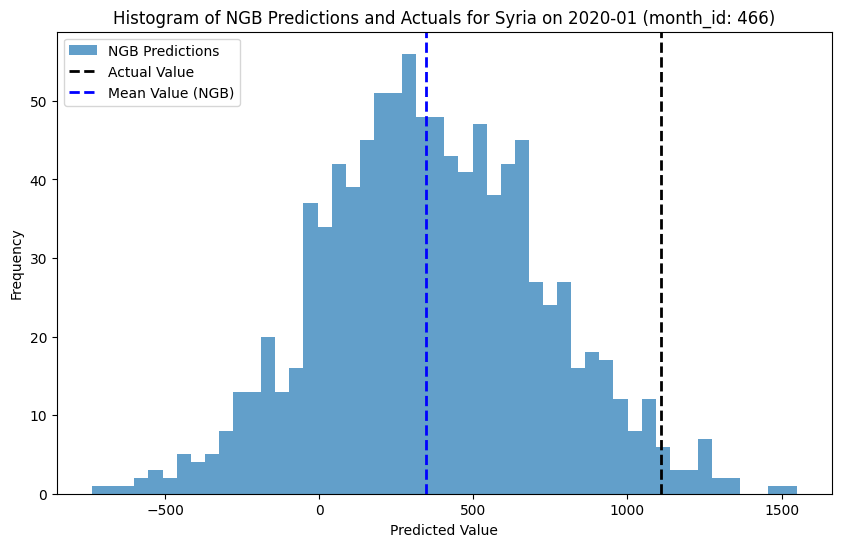

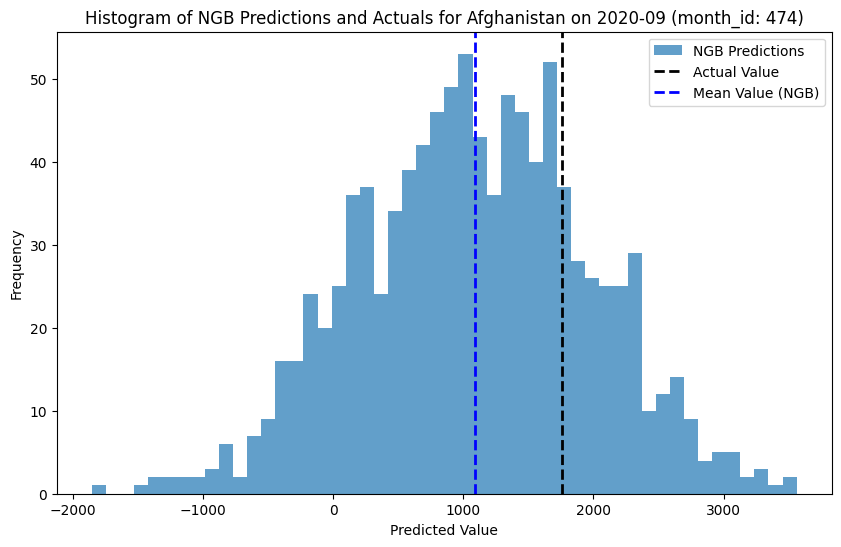

In [598]:

for index_id in indices_to_plot:
    rowww = test_df_new.iloc[[index_id]]
    actual_pred = rowww[target].values[0]
    hist_data_temp = rowww.iloc[:, test_df_edge:].values[0]
    # keep only samples that are in 95% confidence interval

    # Plot histogram of the sampled predictions using plt
    plt.figure(figsize=(10, 6))
    plt.hist(hist_data_temp, bins=50, alpha=0.7, label='NGB Predictions')

    # Plot vertical lines for actual value, mean value, and other relevant predictions
    plt.axvline(x=actual_pred, color='black', linestyle='dashed', linewidth=2, label='Actual Value')
    plt.axvline(x=rowww['ngb_predictions'].values[0], color='blue', linestyle='dashed', linewidth=2,
                label='Mean Value (NGB)')
    # plt.axvline(x=rowww['predictions'].values[0], color='red', linestyle='dashed', linewidth=2, label='XGBoost Prediction')
    formatted_date = rowww['date'].dt.strftime('%Y-%m').values[0]
    country_name = rowww['country_name'].values[0]
    plt.title(
        f'Histogram of NGB Predictions and Actuals for {country_name} on {formatted_date} (month_id: {int(rowww["month_id"].values[0])})')
    plt.xlabel('Predicted Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [599]:
test_df_new[test_df_new[target] == test_df_new[target].max()]['ngb_predictions']

1790    2.421268
Name: ngb_predictions, dtype: float64

In [600]:
rowww[['month_id', 'country_id', target, 'ngb_predictions']]

,month_id,country_id,y_shifted,ngb_predictions
1459,474.0,133,1758.0,1091.733472


In [601]:
dist_name = 'normal' if normal_enabled else 'poisson'
prediction_year

2020

In [602]:
if SAVE_PREDICTIONS:

    # Save predictions
    import numpy as np
    import os

    # TODO: for countries that are in actuals but not in the predictions, add them to the predictions with 0
    #  test_df['country_id'].unique()
    #  actuals_model['country_id'].unique()
    missing_countries = set(benchmark_model['country_id'].unique()) - set(test_df_new['country_id'].unique())

    # save predictions to a csv file
    # for each month for each country create 20 draws of the prediction named outcome
    # the structure of the file should be month_id, country_id, draw, outcome
    new_predictions_list = []
    all_countries = set(test_df_new['country_id'].unique()).union(missing_countries)
    for month_id in test_df_new['month_id'].unique():
        for country_id in all_countries:
            this_country_month = test_df_new[
                (test_df_new['month_id'] == month_id) & (test_df_new['country_id'] == country_id)]

            if country_id in missing_countries:
                outcomes = np.zeros(1000)
            else:
                outcomes = this_country_month.iloc[:, test_df_edge:].values[0]

                # remove all values smaller than 0
                non_negatives = outcomes[outcomes >= 0]
                negative_counts = np.sum(outcomes < 0)

                if negative_counts > 0:
                    # Sample from the non-negative distribution to replace negative values
                    # We assume the distribution of non-negatives is suitable for sampling
                    sampled_values = np.random.choice(non_negatives, size=negative_counts)
                    outcomes[outcomes < 0] = sampled_values

            new_predictions_list.extend([{
                'month_id': month_id + 15,  # adjust for prediction window
                'country_id': country_id,
                'draw': draw,
                'outcome': outcome
            } for draw, outcome in enumerate(outcomes, start=0)])

    # set month_id, country_id, draw as int and outcome as float
    new_predictions = pd.DataFrame(new_predictions_list)
    new_predictions['month_id'] = new_predictions['month_id'].astype(int)
    new_predictions['country_id'] = new_predictions['country_id'].astype(int)
    new_predictions['draw'] = new_predictions['draw'].astype(int)
    new_predictions['outcome'] = new_predictions['outcome'].astype(int)
    # set index to month_id, country_id, draw
    new_predictions.set_index(['month_id', 'country_id', 'draw'], inplace=True)
    # create folder if it does not exist recursively
    folder = f"submission/ng_boost_{dist_name}_d_{DROP_0_ROWS_PERCENT}_n_{n_estimators}_s_{score.__name__.lower()}_c_{str(INCLUDE_COUNTRY_ID)[0]}_m_{str(INCLUDE_MONTH_ID)[0]}_bsd_{bs_max_depth}/cm/window=Y{prediction_year}"
    os.makedirs(folder, exist_ok=True)
    new_predictions.to_parquet(
        folder + f'/ng_boost_{dist_name}_d_{DROP_0_ROWS_PERCENT}_n_{n_estimators}_Y{prediction_year}.parquet')
    print(f"Predictions saved")


Predictions saved


In [603]:
train_df.shape

(17353, 299)